# <center><font color="black"><font style = "font-family:Bookman Old Style"><font size=6> <ins>**CREDIT EDA CASE STUDY**
    

https://www.youtube.com/@ProgrammingIsFunn    


## Index

 - Introduction
 - Problem Statement
 - Business Objectives
 - Importing Libraries
 
 
 - **Data Understanding**
   - Data Reading
   - Data Types
   - Data Imbalance
   
   
 - **Data Cleaning and Manipulation**
   - Date – Days , Year , Month
   - Missing Values
   - Imputation
   - Outliers
   
   
 - **Data Analysis - Current Application & Previous Application**
   - Univariate & Segmented Univariate Analysis – Bar Plots , Pie Plots
   - Bivariate Analysis – Bar Plots , Scatter Plots
   - Correlation b/w Variables using Heat Map and Correlation Matrix Percentage.
   
   
 - **Conclusions & Key Factors**
 <br><br>

## <font style = "font-family:Georgia"><font color="black"><center>Introduction</center></font></font>
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## <font style = "font-family:Georgia"><font color="black"><center>Problem Statement</center></font></font>
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.<br><br>
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
 - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
 - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

## <font style = "font-family:Georgia"><font color="black"><center>Business Objectives</center></font></font>
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
<br><br>

### <font style = "font-family:Georgia"><font color="black"><ins> Importing necessary libraries:

In [1]:
import pandas as pd                    #Library for working on dataframe
import numpy as np                     #Library for mathmatical calculations
import matplotlib.pyplot as plt        #Library for data-visualization (plotting graphs & frame adjustment)
import seaborn as sns                  #Library for data-visualization (plotting graphs)
import warnings                        #Library for supressing warnings
warnings.filterwarnings("ignore")

### <font style = "font-family:Georgia"><font color="black"><ins>Jupyter view settings:

In [2]:
# Max rows and columns view setting for Dataframe:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# Plot Frame setting for Data-visualization:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'font.weight': 'bold'
         }
pylab.rcParams.update(params)

# Setting grid theme for graphs
# sns.set_theme(style='whitegrid')

<font style = "font-family:Georgia"><font color="black"><b>Disable output scroll bar (using java script)

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# <font style = "font-family:Georgia"><font color="black"> Data Understanding Cleaning & Manipulation

### <font style = "font-family:Georgia"><font color="black"><ins> Reading application-data file:

In [4]:
bank = pd.read_csv(r"C:\Users\HP\Downloads\Credit EDA Case Study\application_data.csv")
print(f"\nRows Size    : {bank.shape[0]}\nColumns Size : {bank.shape[1]}")
bank.head()


Rows Size    : 307511
Columns Size : 122


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## <font style = "font-family:Georgia"><font color="black"><ins> Data Type of Columns____________________________________________

In [5]:
# Data-type counts of columns:
print(bank.dtypes.value_counts())
print("-"*40)
# Columns Data-type:
print(f'Columns{" "*24}Data type')
bank.dtypes

float64    65
int64      41
object     16
dtype: int64
----------------------------------------
Columns                        Data type


SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


## <font style = "font-family:Georgia"><font color="black"><ins> Data Imbalance________________________________________________

##### Checking data imbalance by target column : 0 - Non-defaulter  ,  1 - defaulter

In [6]:
print("Non-defaulters Count :",bank.TARGET.value_counts()[0])
print("Defaulters Count     :",bank.TARGET.value_counts()[1])

Non-defaulters Count : 282686
Defaulters Count     : 24825


##### percentage of Data Imbalance :

Non-defaulters Percentage : 91.93
Defaulters Percentage     : 8.07


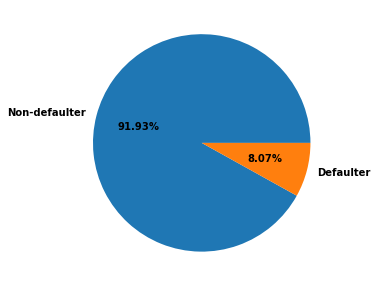

In [7]:
print("Non-defaulters Percentage :",round(bank.TARGET.value_counts(normalize=True)[0]*100,2))
print("Defaulters Percentage     :",round(bank.TARGET.value_counts(normalize=True)[1]*100,2))
bank.TARGET.value_counts(normalize=True).plot.pie(autopct = "%1.2f%%",labels=["Non-defaulter","Defaulter"])
plt.ylabel("")
plt.show()

##### Ratio of Defaulters & Non-Defaulters :

In [8]:
print("Ratio :",round(bank.TARGET.value_counts()[0]/bank.TARGET.value_counts()[1],2),"%")

Ratio : 11.39 %


<div class="alert alert-block alert-info">
<font color="black">
<b><ins>Observation</ins> - Data Imbalance:</b><br>
    
<ul><li>We can see from the information above that there is a significant amount of <b>Data Imbalance</b> in the <b>TARGET</b> Column.
<li> There are <b>91.93 percent Non-Defaulters</b> and <b>8.07 percent Deafaulters</b>.
<li> Defaulter clients with payment difficulty are <b>24825</b>.
<li> Non-Defaulter clients are <b>282686</b>.
<li> Ratio of Deafulters & Non-Defaulters is <b>11.39%</b>.
</div>

## <font style = "font-family:Georgia"><font color="black"><ins> Date Check - Days - Quarter - Years__________________________________

In [9]:
# Creating days column list :
day_col = [col for col in bank.columns if ("DAY") in col]
day_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'WEEKDAY_APPR_PROCESS_START',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_DAY']

##### Let's Check above columns Values :

In [10]:
bank[day_col].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY
0,-9461,-637,-3648.0,-2120,WEDNESDAY,-1134.0,0.0
1,-16765,-1188,-1186.0,-291,MONDAY,-828.0,0.0
2,-19046,-225,-4260.0,-2531,MONDAY,-815.0,0.0
3,-19005,-3039,-9833.0,-2437,WEDNESDAY,-617.0,NaN
4,-19932,-3038,-4311.0,-3458,THURSDAY,-1106.0,0.0


- **As we can see above some columns having -ve values.**<br>
`DAYS_BIRTH` , `DAYS_EMPLOYED` , `DAYS_REGISTRATION` , `DAYS_ID_PUBLISH` , `DAYS_LAST_PHONE_CHANGE`

##### Let's convert above columns to +ve :

In [11]:
bank['DAYS_BIRTH']=bank['DAYS_BIRTH'].abs()
bank['DAYS_EMPLOYED']=bank['DAYS_EMPLOYED'].abs()
bank['DAYS_REGISTRATION']=bank['DAYS_REGISTRATION'].abs()
bank['DAYS_ID_PUBLISH']=bank['DAYS_ID_PUBLISH'].abs()
bank['DAYS_LAST_PHONE_CHANGE']=bank['DAYS_LAST_PHONE_CHANGE'].abs()
bank[day_col].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY
0,9461,637,3648.0,2120,WEDNESDAY,1134.0,0.0
1,16765,1188,1186.0,291,MONDAY,828.0,0.0
2,19046,225,4260.0,2531,MONDAY,815.0,0.0
3,19005,3039,9833.0,2437,WEDNESDAY,617.0,NaN
4,19932,3038,4311.0,3458,THURSDAY,1106.0,0.0


<div class="alert alert-block alert-info">
<font color="black">
<b><ins>Observation & Treatment</ins> - Days Conversion:</b><br>
    
<ul><li> Above we have seen that some <b>Days</b> columns having <b>-ve values</b>.
<li> We have converted <b>-ve</b> values to <b>+ve</b> using <b>abs()</b> function.
</div>

<br>

## <font style = "font-family:Georgia"><font color="black"><ins> Missing Values or NANs__________________________________________

##### Finding out the null values percentage in each column :


Total NANs in Dataframe : 9152465
Count of NAN columns    : 67
Columns Above 50% NANs  : 41
Columns Below 50% NANs  : 26
---------------------------------------------
Columns                      Null percentage
COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                  

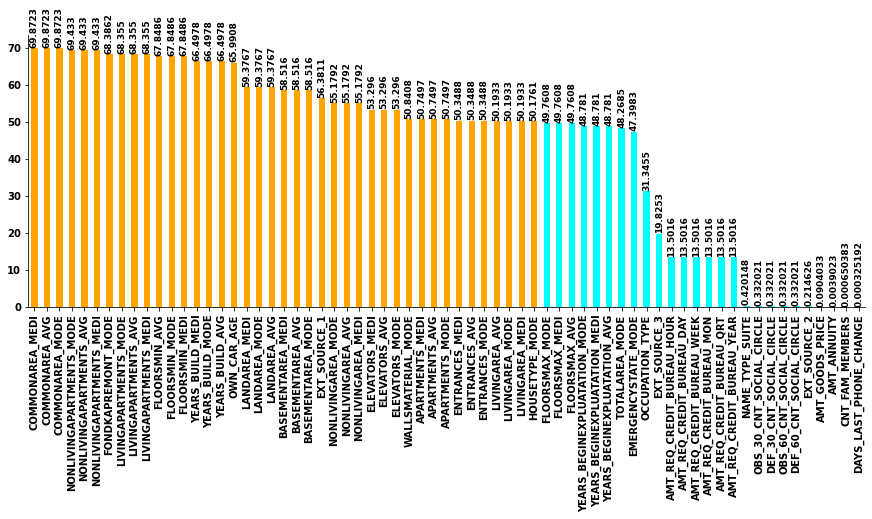

In [12]:
percent_null = (bank.isnull().mean() * 100).sort_values(ascending=False)

print(f"""\nTotal NANs in Dataframe : {bank.isnull().sum().sum()}
Count of NAN columns    : {bank.isnull().any().sum()}
Columns Above 50% NANs  : {sum(percent_null>=50)}
Columns Below 50% NANs  : {sum((percent_null<50)&(percent_null>0))}\n{'-'*45}
Columns{" "*22}Null percentage
{percent_null.head(bank.isnull().any().sum())}""")
ax=percent_null.head(bank.isnull().any().sum()).plot.bar(color=["orange" if x>50 else "cyan" for x in percent_null.head(67)])
ax.bar_label(ax.containers[0],rotation=90,size=9,padding=0.5)
sns.despine()

####  Updated DataFrame :
 - Considering columns having null values 0 and below 50%

In [13]:
bank1 = bank.loc[:,percent_null<50]
print(f"Rows Size    : {bank1.shape[0]}\nColumns Size : {bank1.shape[1]}")

Rows Size    : 307511
Columns Size : 81


<div class="alert alert-block alert-info">
<font color="black">
<b><ins>Observation & Treatment</ins> - Missing Values:</b><br>
    
<ul><li><b>Columns with Null values above 50%</b> - Above we can see, there are 41 columns which are having equal-above 50% missing values in them. So, Imputing mean,median or mode values at large scale in every 41 column will not be good for our analysis.<br>
    <i><b>Treatment</b> - We will not consider these columns in our analysis as they are having high percentage of Null values.</i>
</li></ul>
<ul><li><b>Columns with null values below 50%</b> - Above we can see, there are 26 columns which are having below 50% missing values in them.<br>
    <i><b>Treatment</b> - We will analyse these columns before taking any direct decision of Imputing or Dropping.</i>
</li></ul>
</div>

<br>

## <font style = "font-family:Georgia"><font color="black"><ins>Imputation & Missing Values Treatment______________________________

##### Analysing the columns having null values below 50% - 

    FLOORSMAX_MODE                  49.760822
    FLOORSMAX_MEDI                  49.760822
    FLOORSMAX_AVG                   49.760822
    YEARS_BEGINEXPLUATATION_MODE    48.781019
    YEARS_BEGINEXPLUATATION_MEDI    48.781019
    YEARS_BEGINEXPLUATATION_AVG     48.781019
    TOTALAREA_MODE                  48.268517
    EMERGENCYSTATE_MODE             47.398304
    OCCUPATION_TYPE                 31.345545
    EXT_SOURCE_3                    19.825307
    AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
    AMT_REQ_CREDIT_BUREAU_DAY       13.501631
    AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
    AMT_REQ_CREDIT_BUREAU_MON       13.501631
    AMT_REQ_CREDIT_BUREAU_QRT       13.501631
    AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
    NAME_TYPE_SUITE                  0.420148
    OBS_30_CNT_SOCIAL_CIRCLE         0.332021
    DEF_30_CNT_SOCIAL_CIRCLE         0.332021
    OBS_60_CNT_SOCIAL_CIRCLE         0.332021
    DEF_60_CNT_SOCIAL_CIRCLE         0.332021
    EXT_SOURCE_2                     0.214626
    AMT_GOODS_PRICE                  0.090403
    AMT_ANNUITY                      0.003902
    CNT_FAM_MEMBERS                  0.000650
    DAYS_LAST_PHONE_CHANGE           0.000325

In [14]:
# Columns list below 50% Nulls
null_col_below50 = [percent_null.index[x] for x,i in enumerate(percent_null) if (i<50) and (i>0)]
print("Columns count below 50% Null :",len(null_col_below50))
print(null_col_below50)

Columns count below 50% Null : 26
['FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']


### Categorical Column Analysis (below 50% Nulls) :

In [15]:
catcol_below50null = bank1[null_col_below50].select_dtypes(include='object')
print(catcol_below50null.shape)
catcol_below50null.head(3)

(307511, 3)


,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,NAME_TYPE_SUITE
0,No,Laborers,Unaccompanied
1,No,Core staff,Family
2,NaN,Laborers,Unaccompanied



#### Plotting graph of above categorical columns `catcol_below50null` :

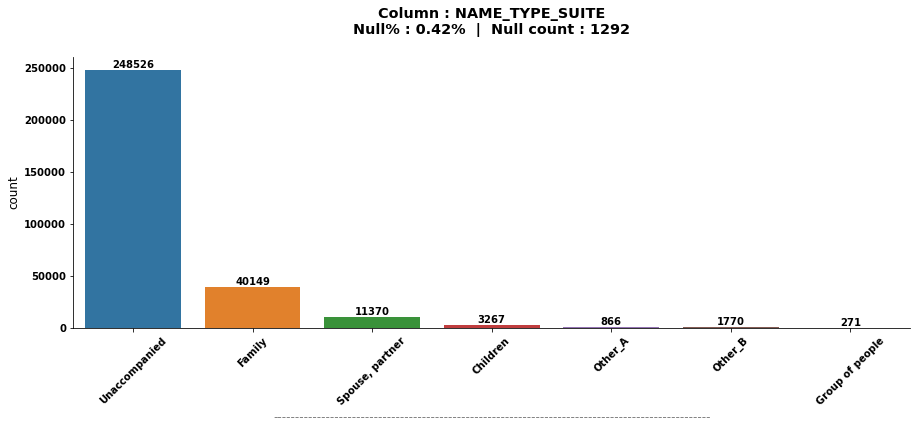

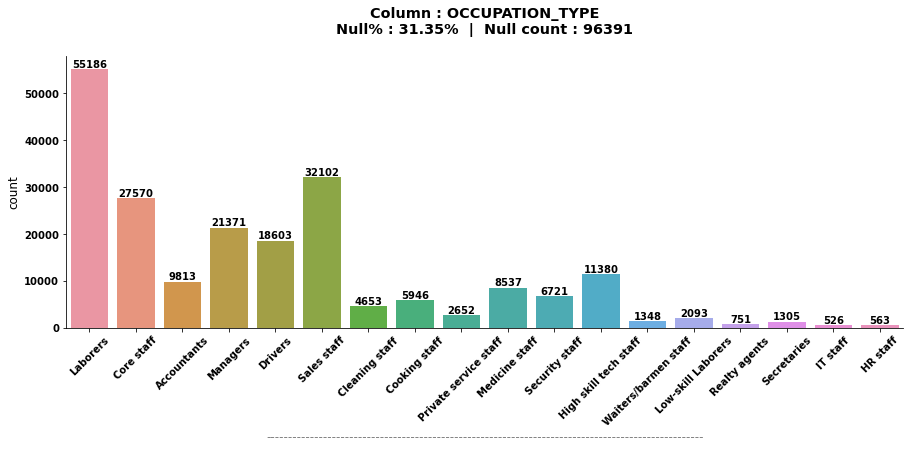

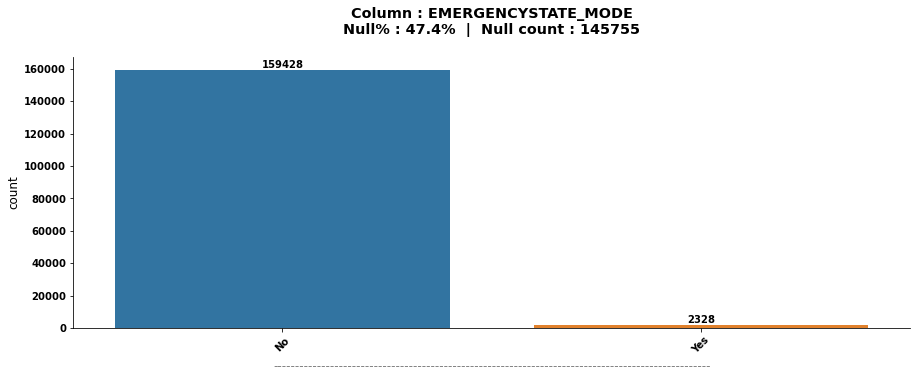

In [16]:
for col in catcol_below50null.columns[::-1]:
    ax = sns.countplot(catcol_below50null[col])
    ax.bar_label(ax.containers[0])
    plt.title(f"Column : {col}\nNull% : {round(catcol_below50null[col].isna().mean()*100,2)}%  |  Null count : {catcol_below50null[col].isna().sum()}\n",weight="bold")
    plt.xlabel("-"*100,color='grey')
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()

#### Mode value of column `NAME_TYPE_SUITE` for Imputation:

In [17]:
catcol_below50null.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

<div class="alert alert-block alert-info">

<font color="black">
<b><ins>Observation & Treatment</ins> - Categorical Null Columns:</b><br>

<ul><li><b>NAME_TYPE_SUITE - </b>This column is significant because it contains information about a person's family members. This column has 0.42 percent fewer missing values.
    <i><b>Treatment</b> -  We can impute the mode value <b>"Unaccompanied"</b> in this column and use it in our analysis.</i>
</li></ul>   

<ul><li><b>OCCUPATION_TYPE - </b>This column is significant because it indicates the person's occupation. However, because this column contains 31% null values, imputing mode values in nulls will result in incorrect analysis.
    <i><b>Treatment</b> -  We will examine this column as is, with no imputation.</i>
</li></ul>
    
<ul><li><b>EMERGENCYSTATE_MODE - </b>There is a lot of data imbalance in this column, as well as a lot of missing values 47%. As a result, imputation of mode value in it will result in incorrect analysis.
    <i><b>Treatment</b> - We will not consider this column in our analysis.</i>
</li></ul>
    

<i><b>Note</b> : We will not impute any values into the columns because we will only be analysing the actual data.</i>
    
</div>

### Numerical Column Analysis (below 50% Nulls)

In [18]:
numcol_below50null = bank1[null_col_below50].select_dtypes(exclude='object')
print(numcol_below50null.shape)
numcol_below50null.head(3)

(307511, 23)


,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,0.0833,0.0833,0.0833,0.9722,0.9722,0.9722,0.0149,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,1134.0
1,0.2917,0.2917,0.2917,0.9851,0.9851,0.9851,0.0714,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,828.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,815.0


#### Plotting graph of above Numerical columns from `numcol_below50null` :

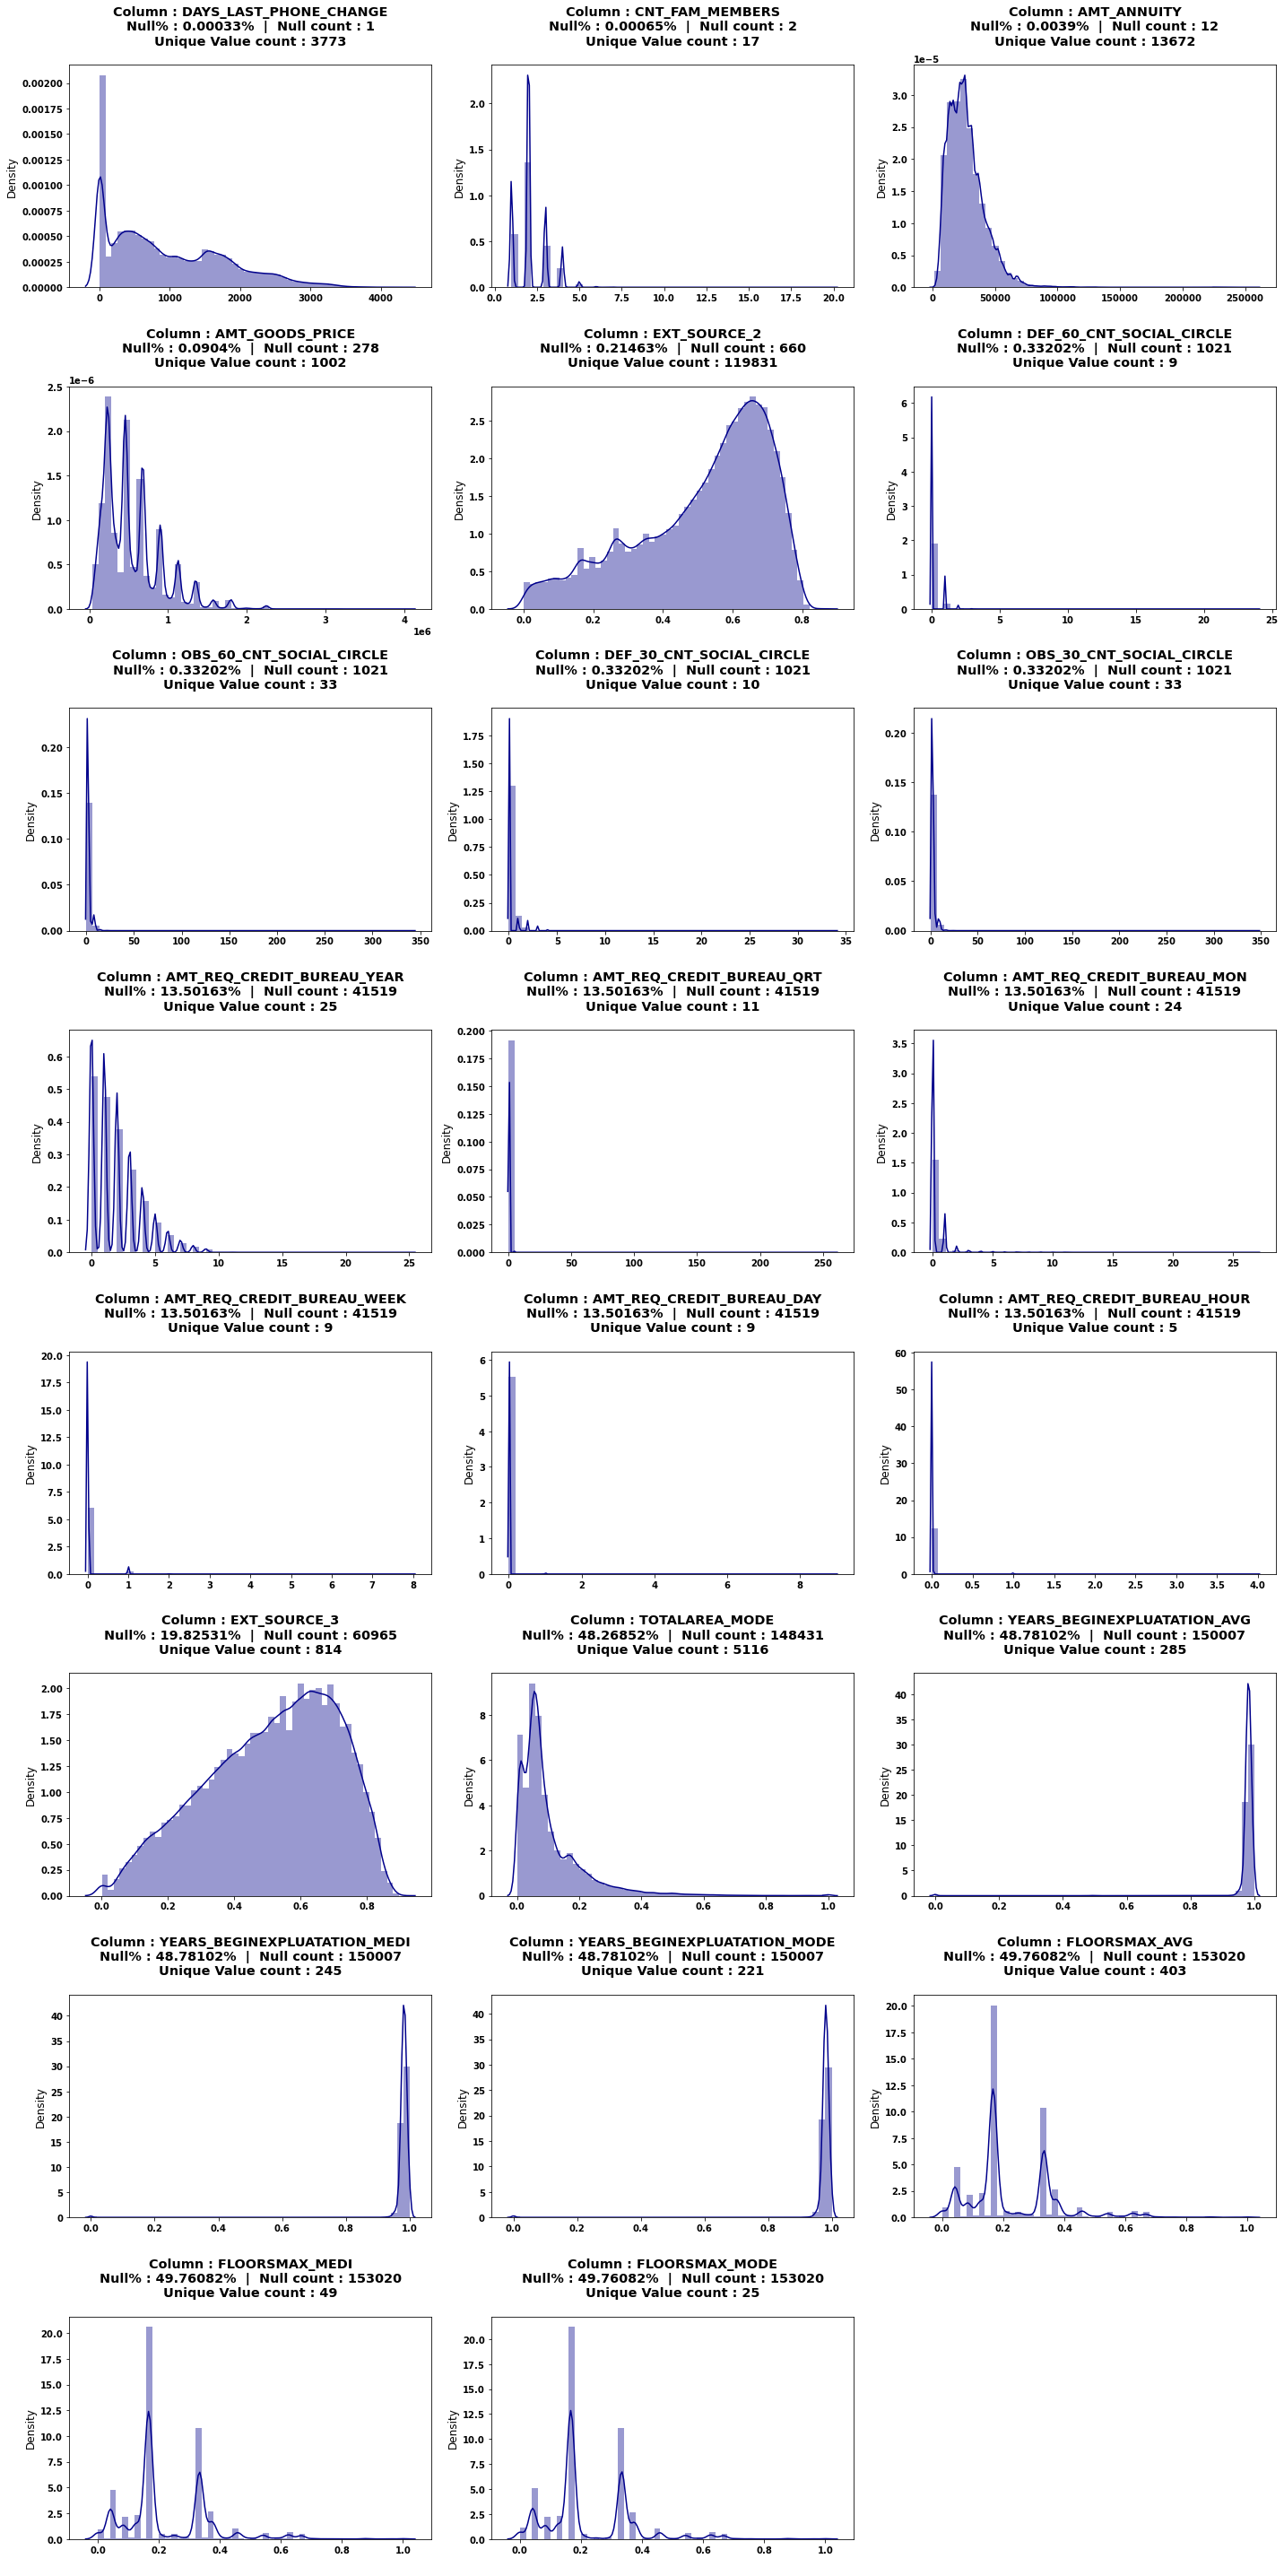

In [19]:
plt.figure(figsize=(20,40))
for index,col in enumerate(numcol_below50null.columns[::-1]):
    plt.subplot(8,3,index+1)
    sns.distplot(numcol_below50null[col],color="darkblue")
    plt.title(f"Column : {col}\nNull% : {round(numcol_below50null[col].isna().mean()*100,5)}%  |  Null count : {numcol_below50null[col].isna().sum()}\nUnique Value count : {numcol_below50null[col].nunique()}\n",weight="bold")
    plt.xlabel(" ")
    plt.tight_layout()

##### Imputation :
- from above graphs analysis we can impute values in some important columns and can ignore some columns which are not important.
- We can use fillna() method for imputation

In [20]:
print("Continuous columns:")
# Median values for continuous columns.
print("Median Value 'AMT_ANNUITY'             : ",numcol_below50null.AMT_ANNUITY.median())
print("Median Value 'AMT_GOODS_PRICE'         : ",numcol_below50null.AMT_GOODS_PRICE.median())
print("Median Value 'EXT_SOURCE_2'            : ",round(numcol_below50null.EXT_SOURCE_2.median(),4))
print("Median Value 'EXT_SOURCE_3'            : ",round(numcol_below50null.EXT_SOURCE_3.median(),4))

# Median values for Discrete columns.
print("\nDiscrete columns:")
print("Mode Value 'DAYS_LAST_PHONE_CHANGE'    : ",numcol_below50null.DAYS_LAST_PHONE_CHANGE.mode()[0])
print("Mode Value 'AMT_REQ_CREDIT_BUREAU_YEAR': ",numcol_below50null.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0])
print("Mode Value 'CNT_FAM_MEMBERS'           : ",numcol_below50null.CNT_FAM_MEMBERS.mode()[0])

Continuous columns:
Median Value 'AMT_ANNUITY'             :  24903.0
Median Value 'AMT_GOODS_PRICE'         :  450000.0
Median Value 'EXT_SOURCE_2'            :  0.566
Median Value 'EXT_SOURCE_3'            :  0.5353

Discrete columns:
Mode Value 'DAYS_LAST_PHONE_CHANGE'    :  0.0
Mode Value 'AMT_REQ_CREDIT_BUREAU_YEAR':  0.0
Mode Value 'CNT_FAM_MEMBERS'           :  2.0


<div class="alert alert-block alert-info">

<font color="black">
    
**Observation & Treatment  -  Missing values of Numerical Columns**    
    
 - These columns having less nulls also distribution of data in these columns is good. Treatment - We can impute mean median mode in these columns. <br>**`DAYS_LAST_PHONE_CHANGE`  ,  `CNT_FAM_MEMBERS`  ,  `AMT_ANNUITY`  ,  `AMT_GOODS_PRICE`  ,  `EXT_SOURCE_2` , `AMT_REQ_CREDIT_BUREAU_YEAR` ,  `EXT_SOURCE_3`**
 
 
 - These columns having less nulls but the majority of data is 0, So these columns acting as constant and has no variation. Treatment - We will skip/ignore these columns in our analysis.<br>**`DEF_60_CNT_SOCIAL_CIRCLE` , `OBS_60_CNT_SOCIAL_CIRCLE` , `DEF_30_CNT_SOCIAL_CIRCLE` , `OBS_30_CNT_SOCIAL_CIRCLE` , `AMT_REQ_CREDIT_BUREAU_QRT` , `AMT_REQ_CREDIT_BUREAU_QRT` , `AMT_REQ_CREDIT_BUREAU_MON` , `AMT_REQ_CREDIT_BUREAU_WEEK` , `AMT_REQ_CREDIT_BUREAU_DAY` , `AMT_REQ_CREDIT_BUREAU_HOUR`**
 
 
 - These columns having high amount of nulls and imputing mean,median in these continuous columns will result data imbalance in columns, also these columns are not so important. Treatment - We will skip/ignore these columns.<br>**`TOTALAREA_MODE`,`YEARS_BEGINEXPLUATATION_AVG`,`YEARS_BEGINEXPLUATATION_MEDI`,`FLOORSMAX_AVG`,`FLOORSMAX_MEDI`,`FLOORSMAX_MODE`**


<br>

## <font style = "font-family:Georgia"><font color="black"><ins> Outlier Analysis________________________________________________

##### Anaysing Numerical columns for outlier analysis :

In [21]:
num_col = bank1.select_dtypes(exclude="object").nunique().sort_values(ascending=False)
num_col = list(num_col.index[1:])
print(len(num_col))
print(list(num_col))

67
['EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'AMT_CREDIT', 'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'REGION_POPULATION_RELATIVE', 'FLOORSMAX_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'FLOORSMAX_MODE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 'HOUR_APPR_PROCESS_START', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13'

##### Plotting the box plot for outliers analysis :

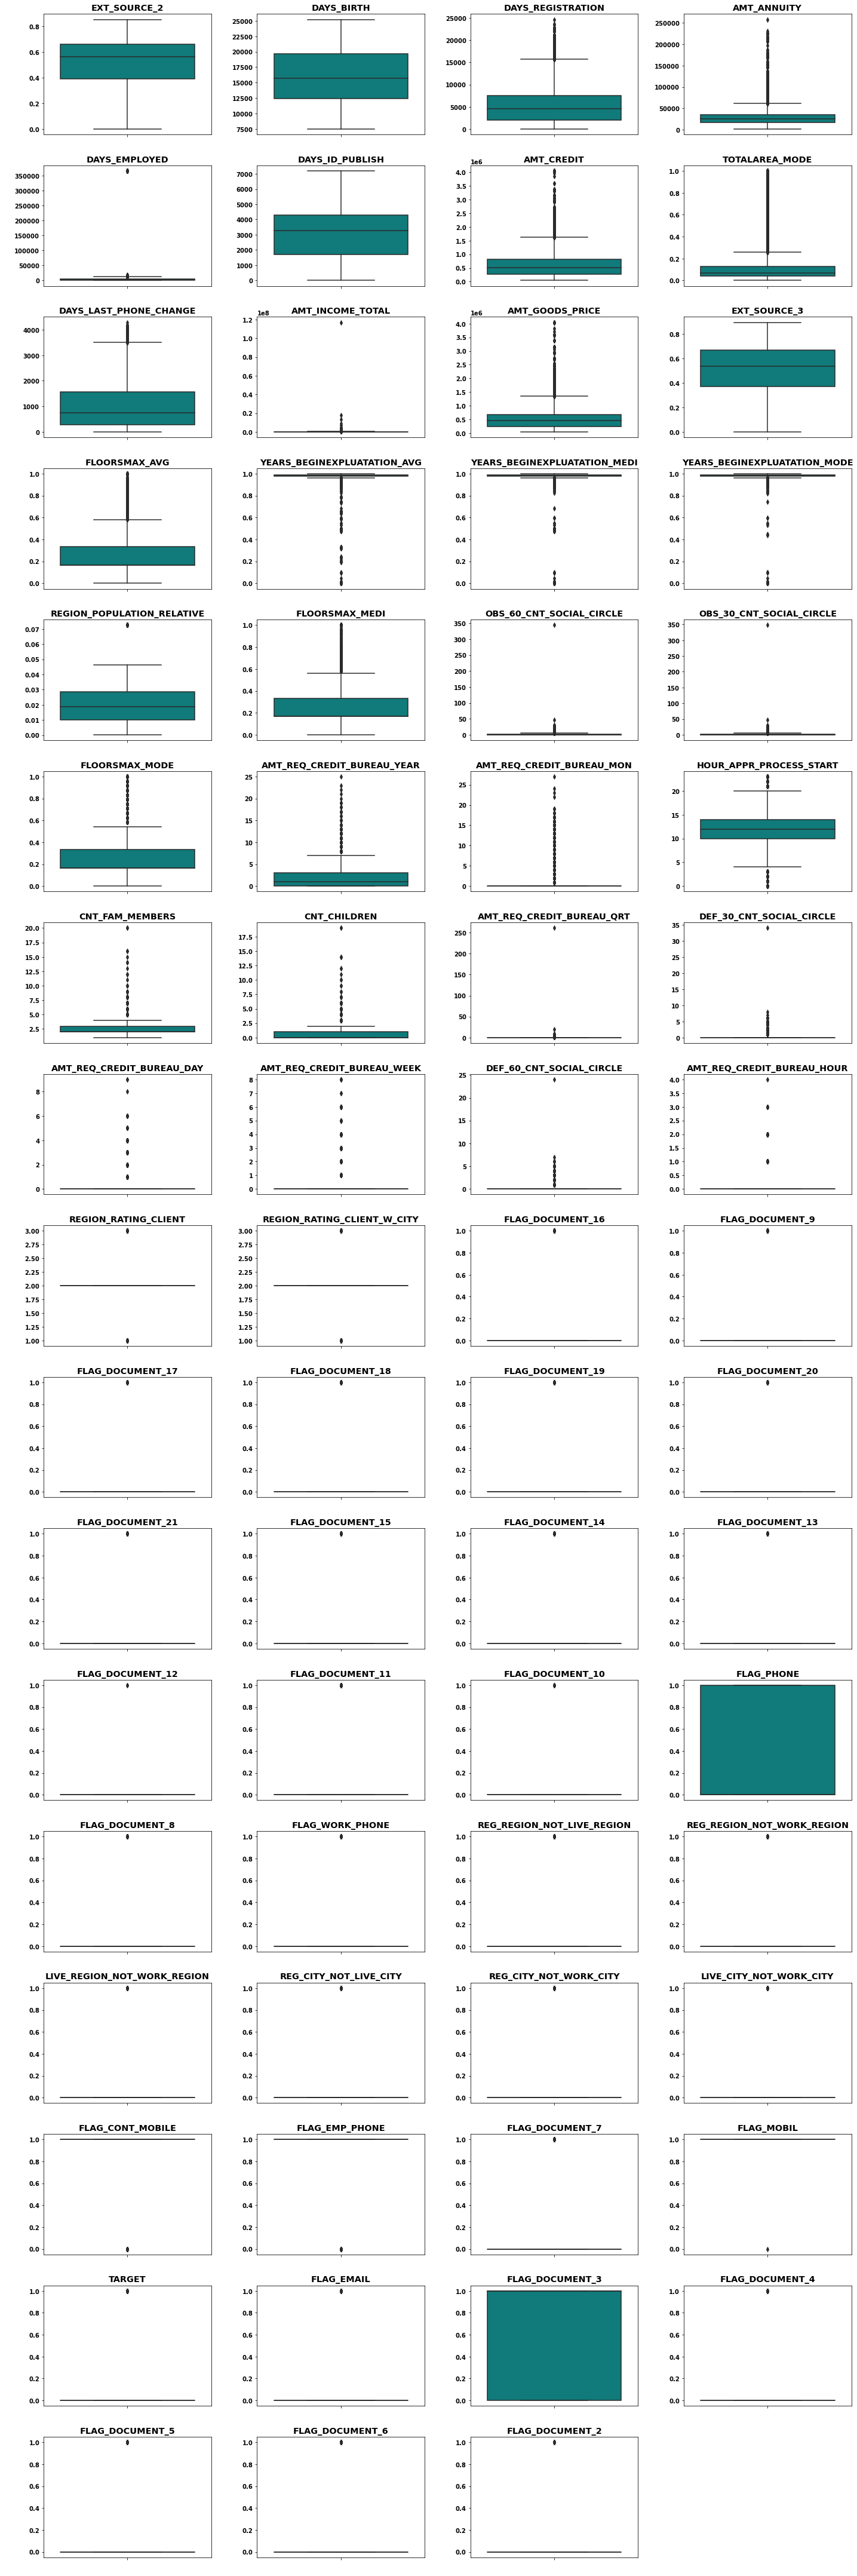

In [22]:
plt.figure(figsize=(20,60))
for index,col in enumerate(num_col):
    plt.subplot(17,4,index+1)
    sns.boxplot(y = bank[col], color="darkcyan")
    plt.title(col,weight="bold")
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()

<div class="alert alert-block alert-info">

<font color="black">
    
**Observation & Treatment  -  Outlier Analysis**    
    
 - These columns having no outliers in them.<br>**`EXT_SOURCE_2,`  ,  `DAYS_BIRTH`  ,  `DAYS_ID_PUBLISH`  ,  `EXT_SOURCE_3`**
 
 
 - These columns having **Extreme outliers** outliers in them.<br>
**`AMT_ANNUITY`,`DAYS_EMPLOYED`,`AMT_CREDIT`,`AMT_INCOME_TOTAL`,`AMT_GOODS_PRICE`,`YEARS_BEGINEXPLUATATION_AVG`,<br>`YEARS_BEGINEXPLUATATION_MEDI`,`YEARS_BEGINEXPLUATATION_MODE`,`REGION_POPULATION_RELATIVE`,`CNT_FAM_MEMBERS`,
 `CNT_CHILDREN`**<br>There are many more columns with extreme outliers like -  Social circle & Fllag Document.
    
    
 - **Treatment:**
    - If the outliers are genuine we can handle outliers by capping them also we can use binning. 
    - If the outliers are not genuine we can simply remove them.
    
    
<font color="maroon">**Note : The analysis of outliers is primarily concerned with the business problem. And, if the data is error-free, removing the extreme value will be determined by the needs of the business. Based on the analysis of the various plots, it appears that there are no errors in the data reporting. Instead of removing them, we will simply highlight the columns with extreme values.**
 

<br>

# Univariate & Segmented Univariate Analysis

##### Splitting data in two parts Defaulter & Non-defaulter for segmented analysis :

In [23]:
default = bank1[bank1.TARGET==1]
default.shape

(24825, 81)

In [24]:
non_default = bank1[bank1.TARGET==0]
non_default.shape

(282686, 81)

### Categorical Columns Univariate analysis

##### Finding out categorical columns :

In [25]:
cat_col = bank1.select_dtypes(include = "object")
print(cat_col.shape)
cat_col.head()

(307511, 13)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN


In [26]:
list(cat_col.columns)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

##### Plotting Graphs for Univariate Analysis:

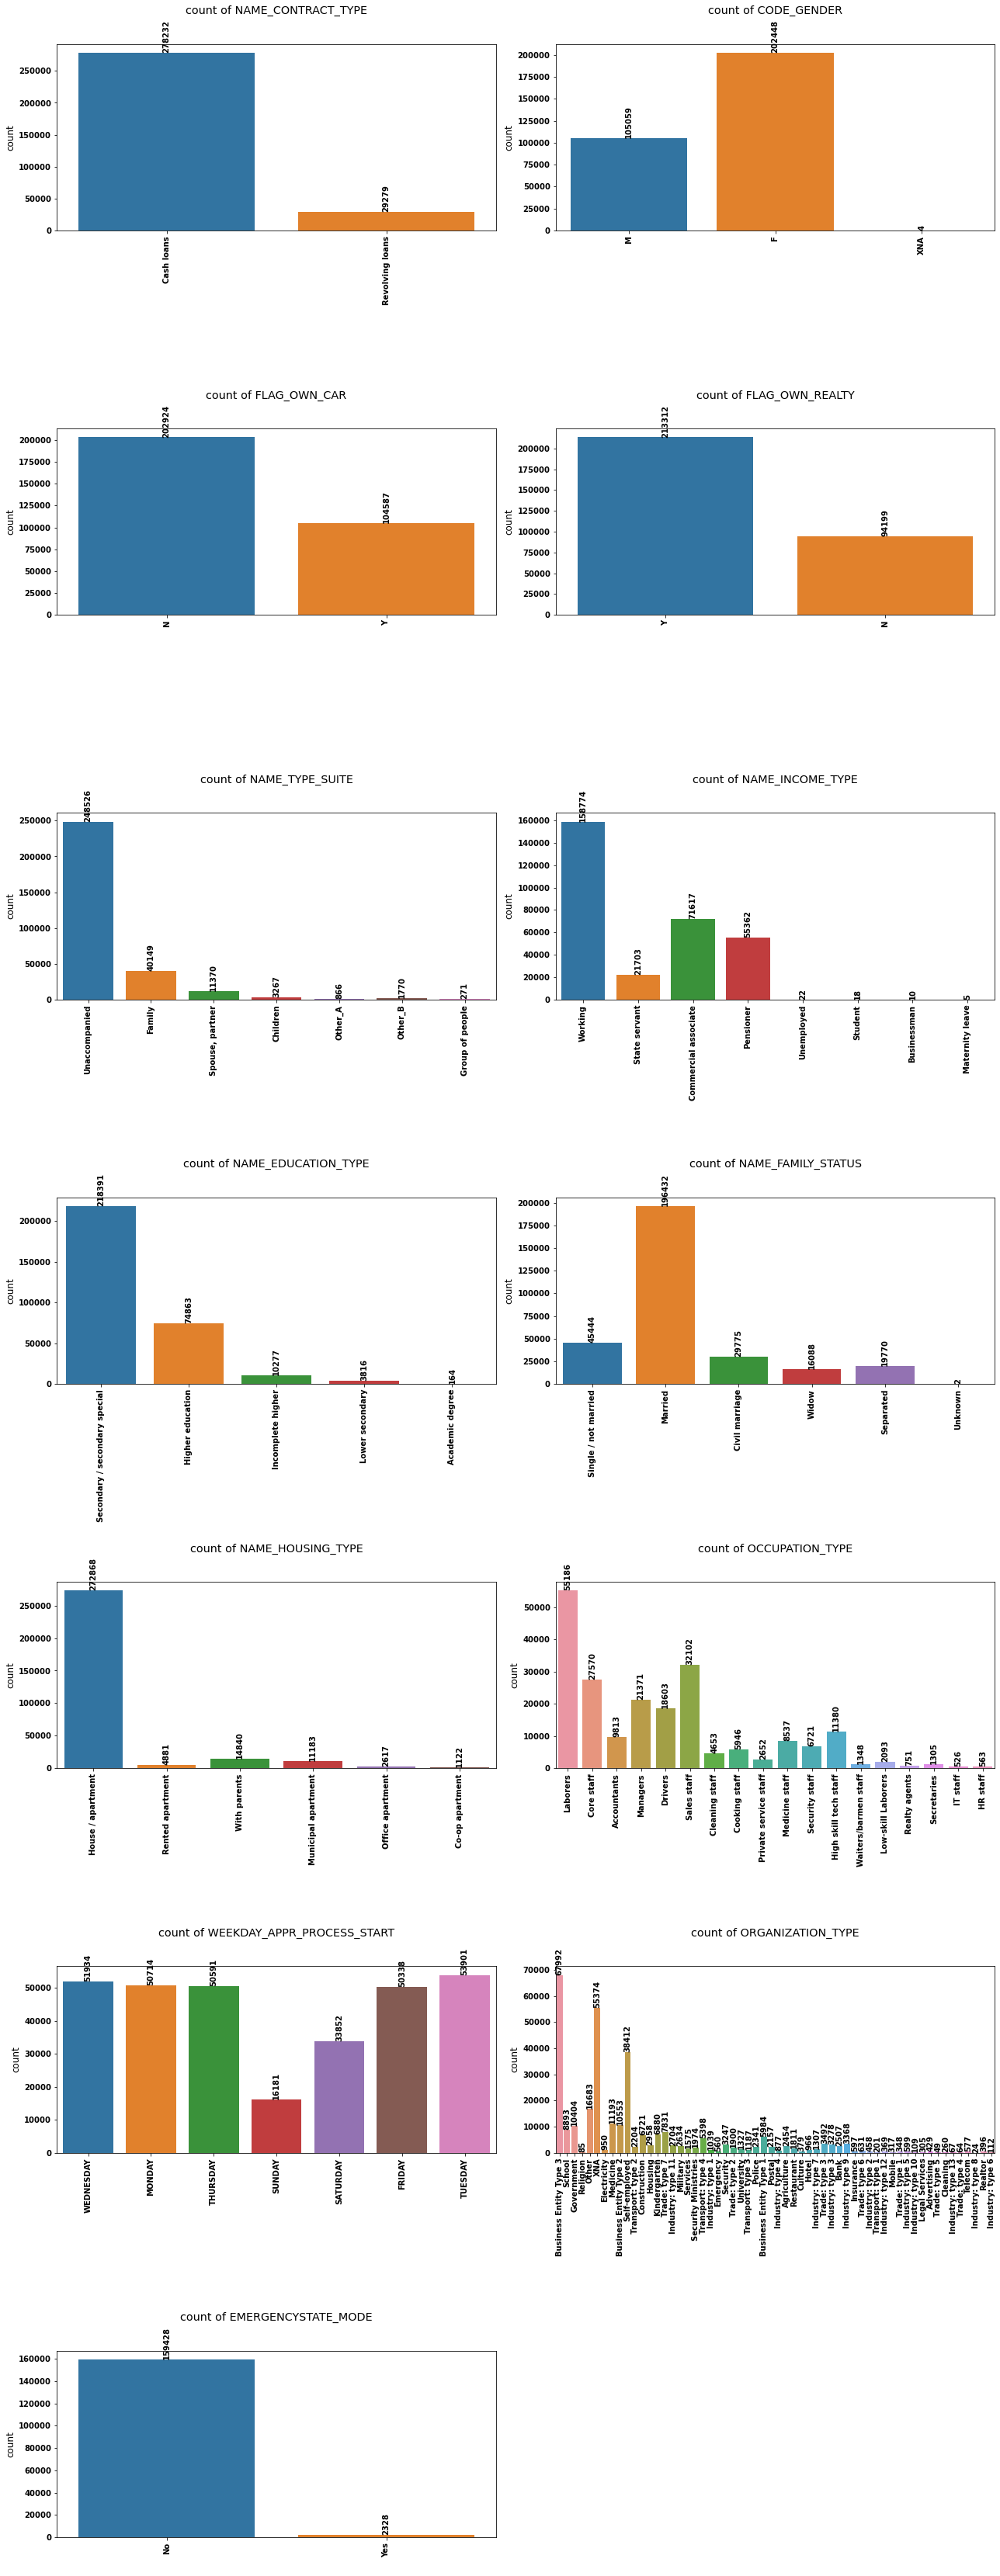

In [27]:
plt.figure(figsize=(18,80))
for index,col in enumerate(cat_col.columns):
    plt.subplot(12,2,index+1)
    ax = sns.countplot(cat_col[col])
    ax.bar_label(ax.containers[0],rotation=90)
    plt.title(f"count of {col}\n\n")
    plt.xticks(rotation = 90)
    plt.xlabel(" ")
    plt.tight_layout()

## Segmented Univariate Analysis

##### Plotting graphs for segmented-univariate analysis:

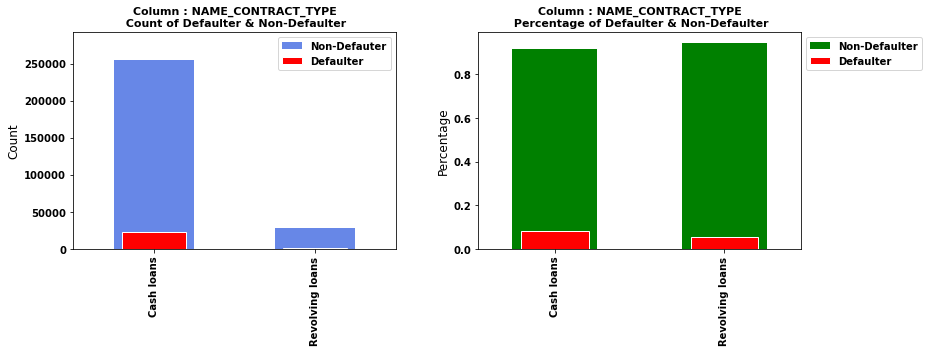

-----------------------------------------------------------------------------------------------------------------------------


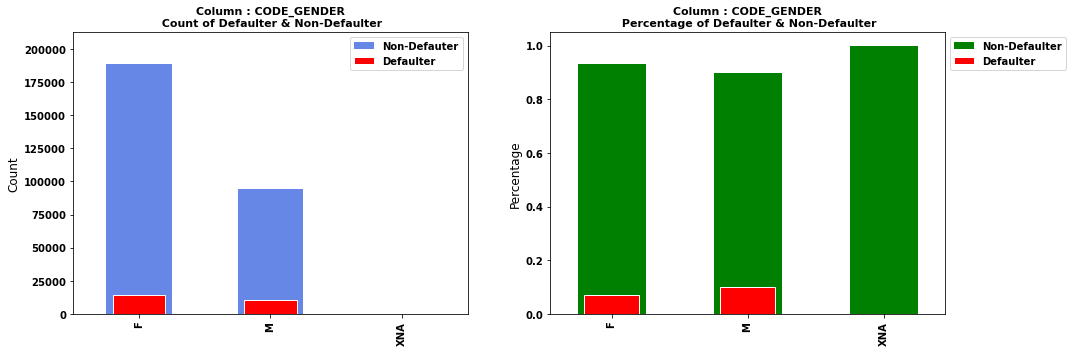

-----------------------------------------------------------------------------------------------------------------------------


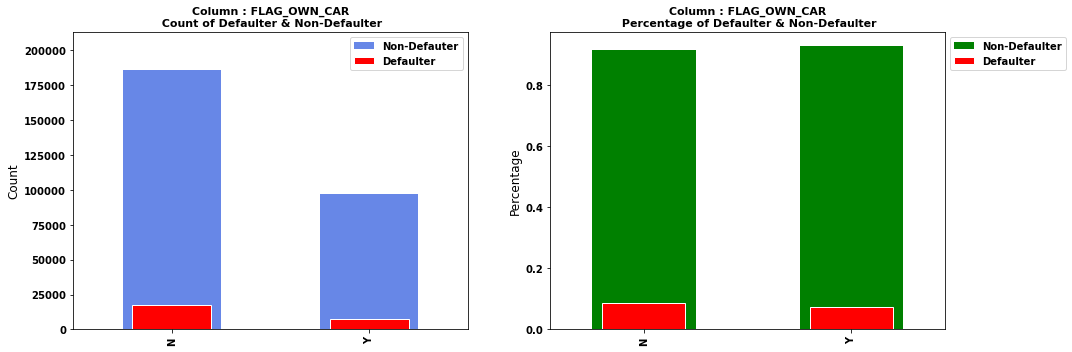

-----------------------------------------------------------------------------------------------------------------------------


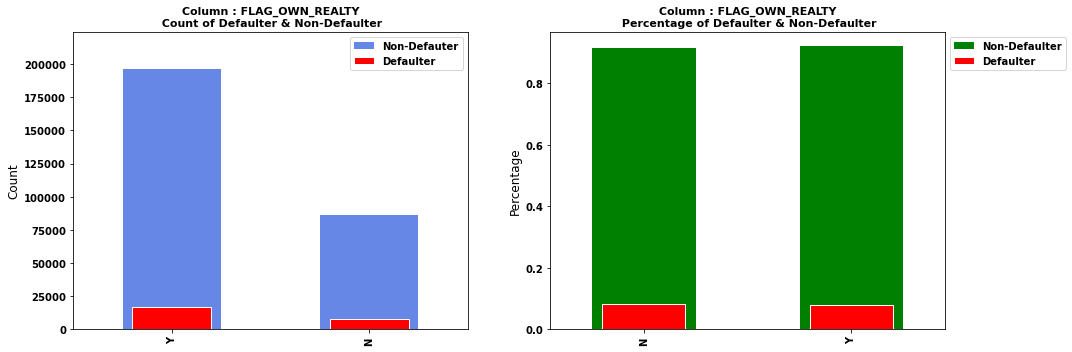

-----------------------------------------------------------------------------------------------------------------------------


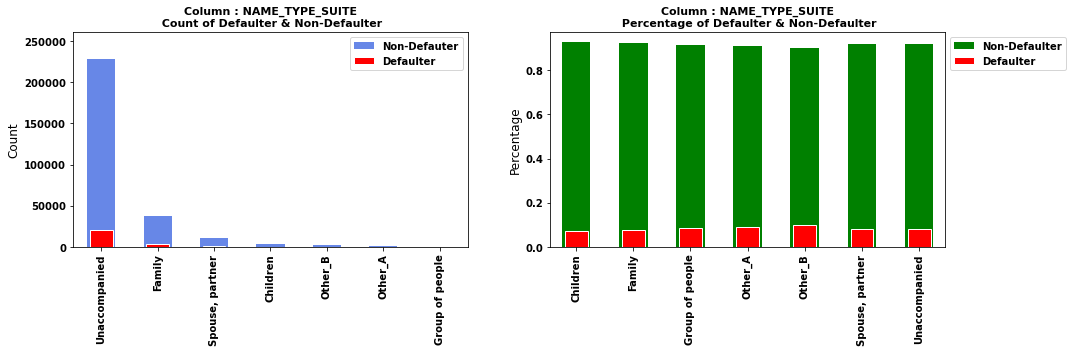

-----------------------------------------------------------------------------------------------------------------------------


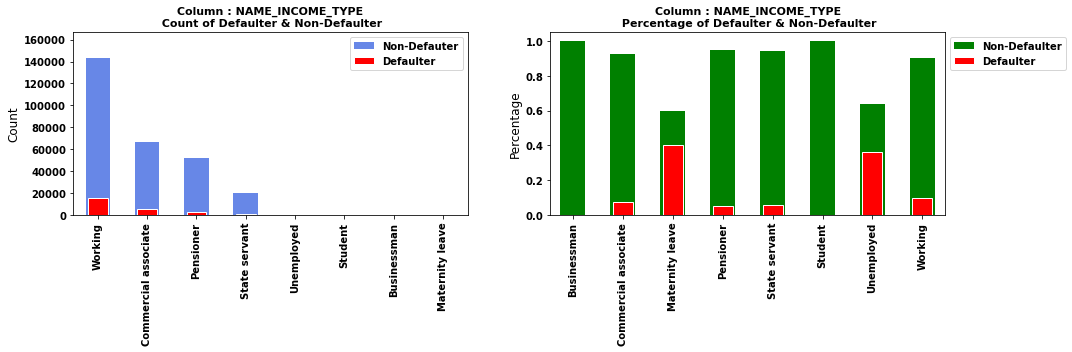

-----------------------------------------------------------------------------------------------------------------------------


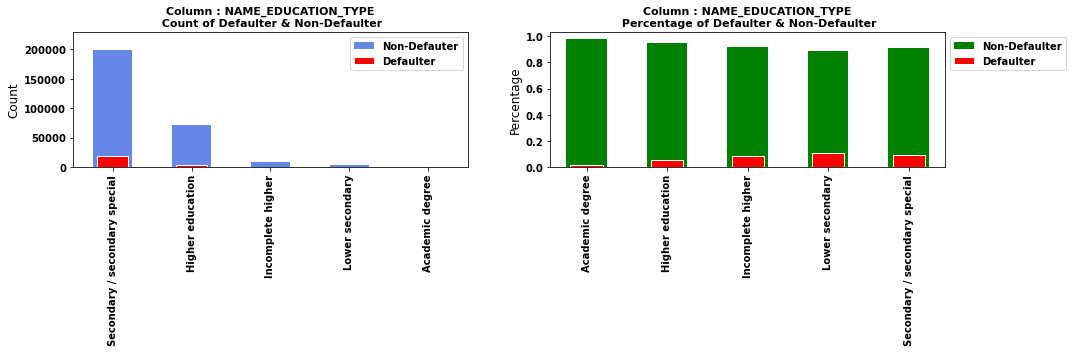

-----------------------------------------------------------------------------------------------------------------------------


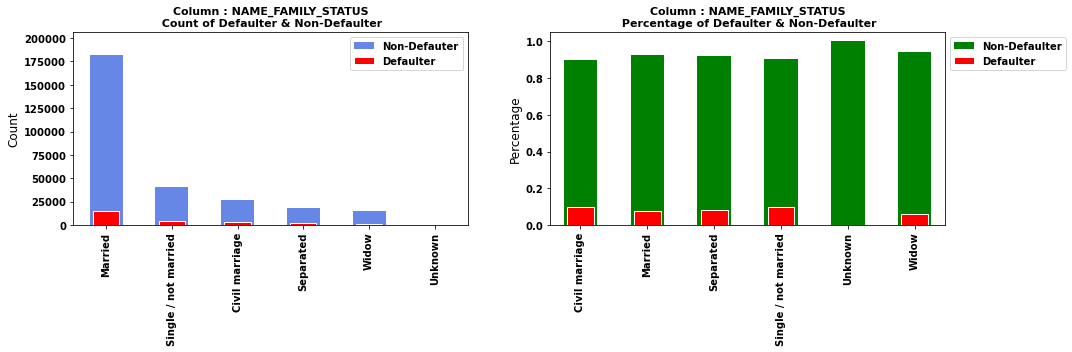

-----------------------------------------------------------------------------------------------------------------------------


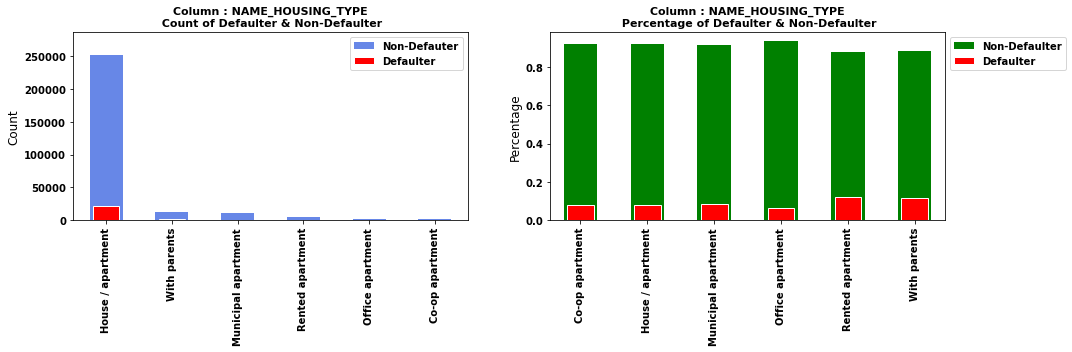

-----------------------------------------------------------------------------------------------------------------------------


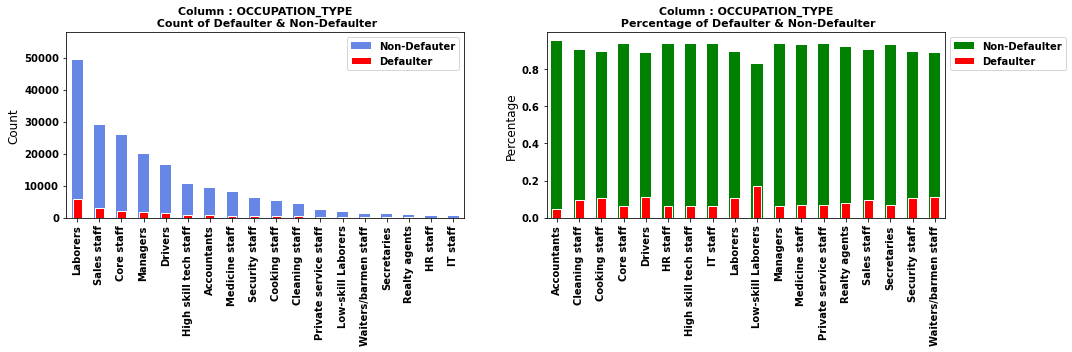

-----------------------------------------------------------------------------------------------------------------------------


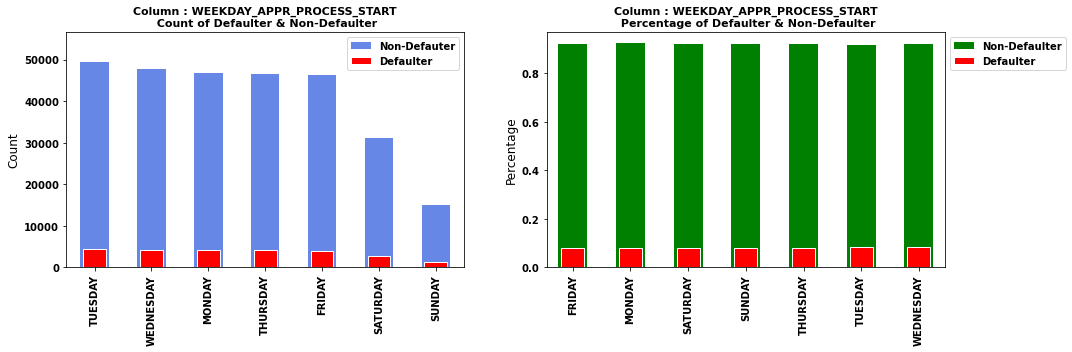

-----------------------------------------------------------------------------------------------------------------------------


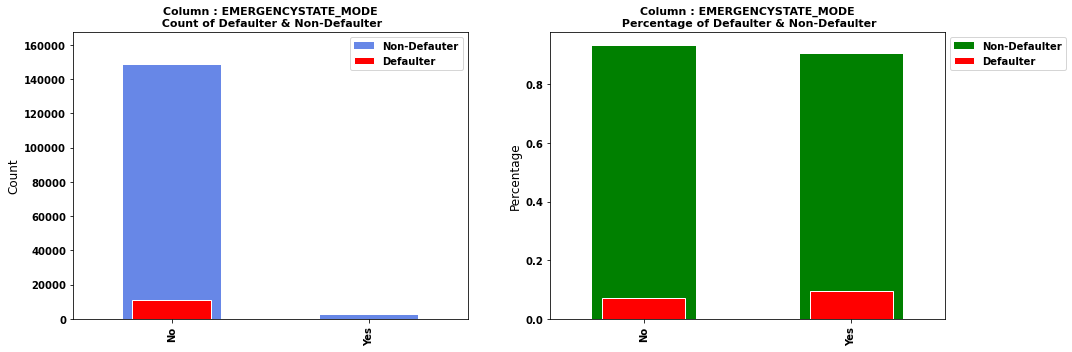

-----------------------------------------------------------------------------------------------------------------------------


In [28]:
cat_col_list = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','EMERGENCYSTATE_MODE']

plt.figure(figsize=(13,5))    
for col in cat_col_list:
    # Plotting count plot of defaulter and non-defaulter customer in particular category.
    plt.subplot(1,2,1)
    non_default[col].value_counts().plot.bar(stacked=True,color="royalblue",alpha=0.8,label = "Non-Defauter")
    default[col].value_counts().plot.bar(stacked=True,color="red",edgecolor="white",width=0.4,label="Defaulter")
    bank1[col].value_counts().plot.bar(stacked=True,alpha=0,label="")
    plt.title(f"Column : {col}\n Count of Defaulter & Non-Defaulter",weight="bold",fontsize=11)
    plt.ylabel("Count")
    plt.legend(fontsize=10)

    # Plotting graph for percentage of defaulter & Non-Defaulter w.r.t total customer in particular category.
    plt.subplot(1,2,2)
    (non_default[col].value_counts().sort_index()/bank1[col].value_counts().sort_index()).plot.bar(stacked=True,color="green",label="Non-Defaulter")
    (default[col].value_counts().sort_index()/bank1[col].value_counts().sort_index()).plot.bar(stacked=True,color="red",edgecolor="white",width=0.4,label="Defaulter")
    ax.bar_label(ax.containers[0])
    plt.legend(bbox_to_anchor=[1,1],fontsize=10)
    plt.ylabel("\n\nPercentage")
    plt.title(f"Column : {col}\n Percentage of Defaulter & Non-Defaulter",weight="bold",fontsize=11)

    plt.tight_layout()
    plt.show()
    print("-"*125)

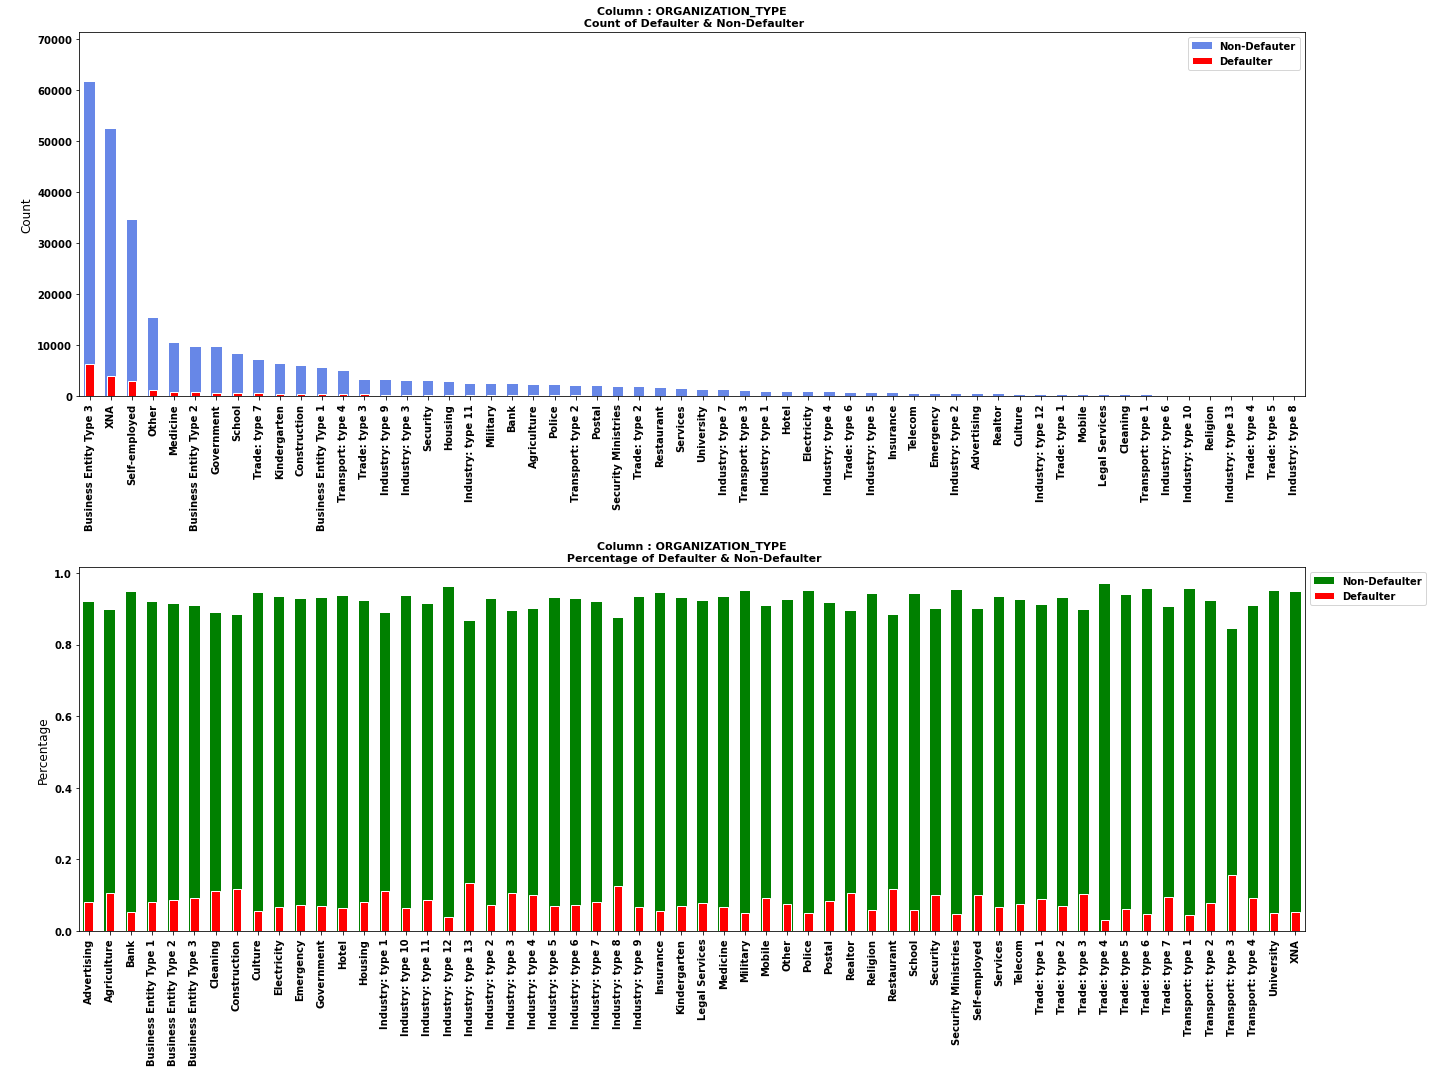

In [29]:
# Plotting ORGANIZATION_TYPE : 
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
non_default["ORGANIZATION_TYPE"].value_counts().plot.bar(stacked=True,color="royalblue",alpha=0.8,label = "Non-Defauter")
default["ORGANIZATION_TYPE"].value_counts().plot.bar(stacked=True,color="red",edgecolor="white",width=0.4,label="Defaulter")
bank1["ORGANIZATION_TYPE"].value_counts().plot.bar(stacked=True,alpha=0,label="")
plt.title(f"Column : ORGANIZATION_TYPE\n Count of Defaulter & Non-Defaulter",weight="bold",fontsize=11)
plt.ylabel("Count")
plt.legend(fontsize=10)

plt.subplot(2,1,2)
(non_default["ORGANIZATION_TYPE"].value_counts().sort_index()/bank1["ORGANIZATION_TYPE"].value_counts().sort_index()).plot.bar(stacked=True,color="green",label="Non-Defaulter")
(default["ORGANIZATION_TYPE"].value_counts().sort_index()/bank1["ORGANIZATION_TYPE"].value_counts().sort_index()).plot.bar(stacked=True,color="red",edgecolor="white",width=0.4,label="Defaulter")
ax.bar_label(ax.containers[0])
plt.legend(bbox_to_anchor=[1,1],fontsize=10)
plt.ylabel("\n\nPercentage")
plt.title(f"Column : ORGANIZATION_TYPE\n Percentage of Defaulter & Non-Defaulter",weight="bold",fontsize=11)

plt.tight_layout()

#### Top 10 Categorical Columns for the Client with payment difficulties

<ol>
    <li>NAME_CONTRACT_TYPE
    <li>CODE_GENDER
    <li>FLAG_OWN_CAR
    <li>FLAG_OWN_REALTY
    <li>NAME_INCOME_TYPE
    <li>NAME_EDUCATION_TYPE
    <li>NAME_FAMILY_STATUS
    <li>NAME_HOUSING_TYPE
    <li>OCCUPATION_TYPE
    <li>ORGANIZATION_TYPE

<div class="alert alert-block alert-info">
    

<font color="black">
    
**Observation & Suggestion  -  Univariate & Segmented Univariate Analysis** <br><br> 
    
 - **`NAME_CONTRACT_TYPE`** - People take **Cash** loans more than **Revolving** loans. Percentage of defaulters in Cash loans are more than **Revolving** loans. Revolving loans are less risky than cash loans.
    
    
 - **`CODE_GENDER`** - Females take more loans than Men. Percentage of defaulters in Females are less than the Men. It is less risky to give loans to Females than Men.
    
    
 - **`FLAG_OWN_CAR`** - People who do not own car take loans more than people who do not own car.People who owns car & not own car are having approx same percentage defaulters in them. But people who owns car are less likely to default.
    
    
 - **`FLAG_OWN_REALTY`** - People having their own realty take loans more than who do not have. Percentage of defaulters & non defaulters are approx same. But the weightage of the people who owns realty is high, so instead of cancelling their applications, we can set some rules to minimize the risk of default. 
    
    
 - **`NAME_INCOME_TYPE`** - Working, Commercial Associate, Pensioner, State servant take loans more and having less percentage of defaulters. Whereas Unemployed and maternity leave people take loans less but having very high percentage of defaulter. Businessman and Student take loans less and no defaulter found in them according to data. 
    
    
 - **`NAME_EDUCATION_TYPE`** - Lower and incomplete education people take loans more and having high percentage of defaulter in them. Higher educated people defaulter percentage is less.
    
    
 - **`NAME_FAMILY_STATUS`** - Married people take more loans whereas single and civil marriage people take less loans but the single & civil marriage people having high percentage of defaulter than married people.
    
    
 - **`NAME_HOUSING_TYPE`** - People living in their house & apartment take loans more whereas people living in rented apartments and with parents take less loans but the percentage of people living in rented apartment and with parents are having high percentage of defaulting risk than the people living in house or apartment.
    
 
 - **`OCCUPATION_TYPE`** - Labour class, core staff, managers, sales staff, drivers take loans more. According to graph all type people having approx equal percentage of defaulting risk. Lower skill labour take less loans and having high percentage of defaulters.
    
 
 - **`ORGANIZATION_TYPE`** - Transport: type 3, Industry: type 13 , Industry: type 8 , and Restaurant: type 3  are the organisations with the highest percentage of loans not repaid (less than 12 percent ). Self-employed people have a high default rate and should be avoided when applying for a loan or providing a loan with a higher interest rate to mitigate the risk.

### Numerical Columns Univariate  Segmented Analysis

##### Plotting graph for numerical columns :

No handles with labels found to put in legend.


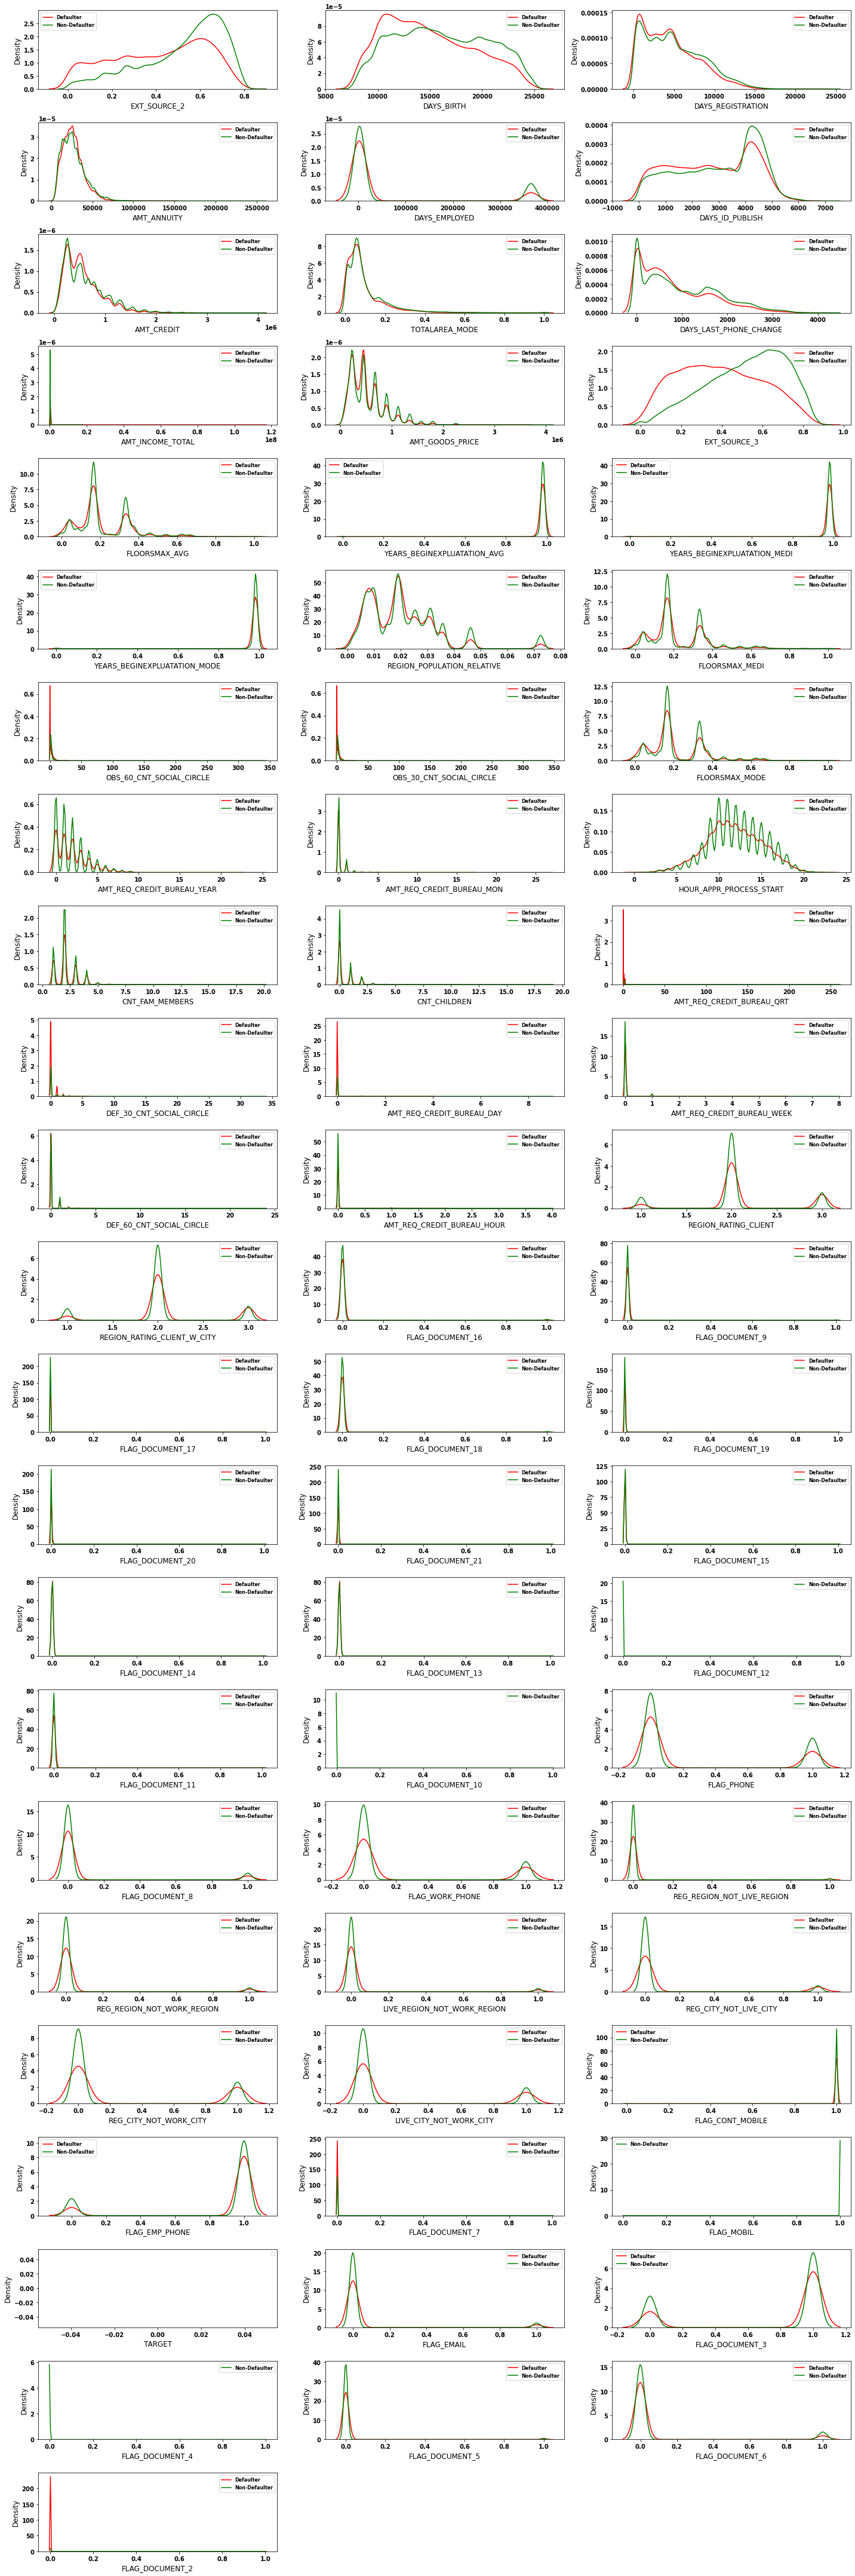

In [30]:
plt.figure(figsize=(20,60))
for index,col in enumerate(num_col):
    plt.subplot((len(num_col)//3)+1,3,index+1)
    sns.distplot(default[col],hist=False,label="Defaulter",color="red")
    sns.distplot(non_default[col],hist=False,label="Non-Defaulter",color="green")
    plt.legend(fontsize=8)
    plt.tight_layout()

#### Top 10 Numerical Columns for the Client with payment difficulties

<ol>
    <li>DAYS_BIRTH
    <li>DAYS_EMPLOYED
    <li>DAYS_ID_PUBLISH
    <li>DAYS_LAST_PHONE_CHANGE
    <li>HOURS_APPR_PROCESS_START
    <li>CNT_FAM_MEMBERS
    <li>AMT_INCOME_TOTAL
    <li>AMT_ANNUITY
    <li>AMT_GOODS_PRICE
    <li>AMT_CREDIT

<div class="alert alert-block alert-info">
    

<font color="black">


<b>Observation & Suggestion - Numerical Univariate & Segmented Univariate Analysis</b>

According to above graphs, Observations for top 10 correlated columns are as follows :

 - **`DAYS_BIRTH`** - People aged 10000 days (27 years) to 15000 days (41 years) are more likely to take out loans and have a higher rate of default.
 
 
 - **`DAYS_EMPLOYED`** - People who have recently been employed prior to applying for a loan are more likely to default.
 
 
 - **`DAYS_ID_PUBLISH`** - People whose IDs were published between 4000-5000 days take out more loans and have a higher default rate.
 
 
 - **`DAYS_LAST_PHONE_CHANGE`** - People who have changed their phone number within the last 200 days borrow more and have a higher default rate.
 
 
 - **`HOURS_APPR_PROCESS_START`** - Between 10:00 am to 2:00 pm high amount of loans are given and have high defaulter rate.
 
 
 - **`CNT_FAM_MEMBERS`** - People with family members 2-5 are likey to take more loans.
 
 
 - **`AMT_INCOME_TOTAL`** - Low-income individuals are more likely to default.
 
 
 - **`AMT_ANNUITY`** - Annuity with a low payout has a large number of loans and are more likely to default.
 
 
 - **`AMT_GOODS_PRICE`** - People Having Low Price of goods default the most.
 
 
 - **`AMT_CREDIT`** - The people who take less amount of loans are more likely to default.

# Bivariate Analysis 

### Categorical v/s Categorical Target Column

##### Plotting graph between Category and Target mean to find the percentage of defaulters :

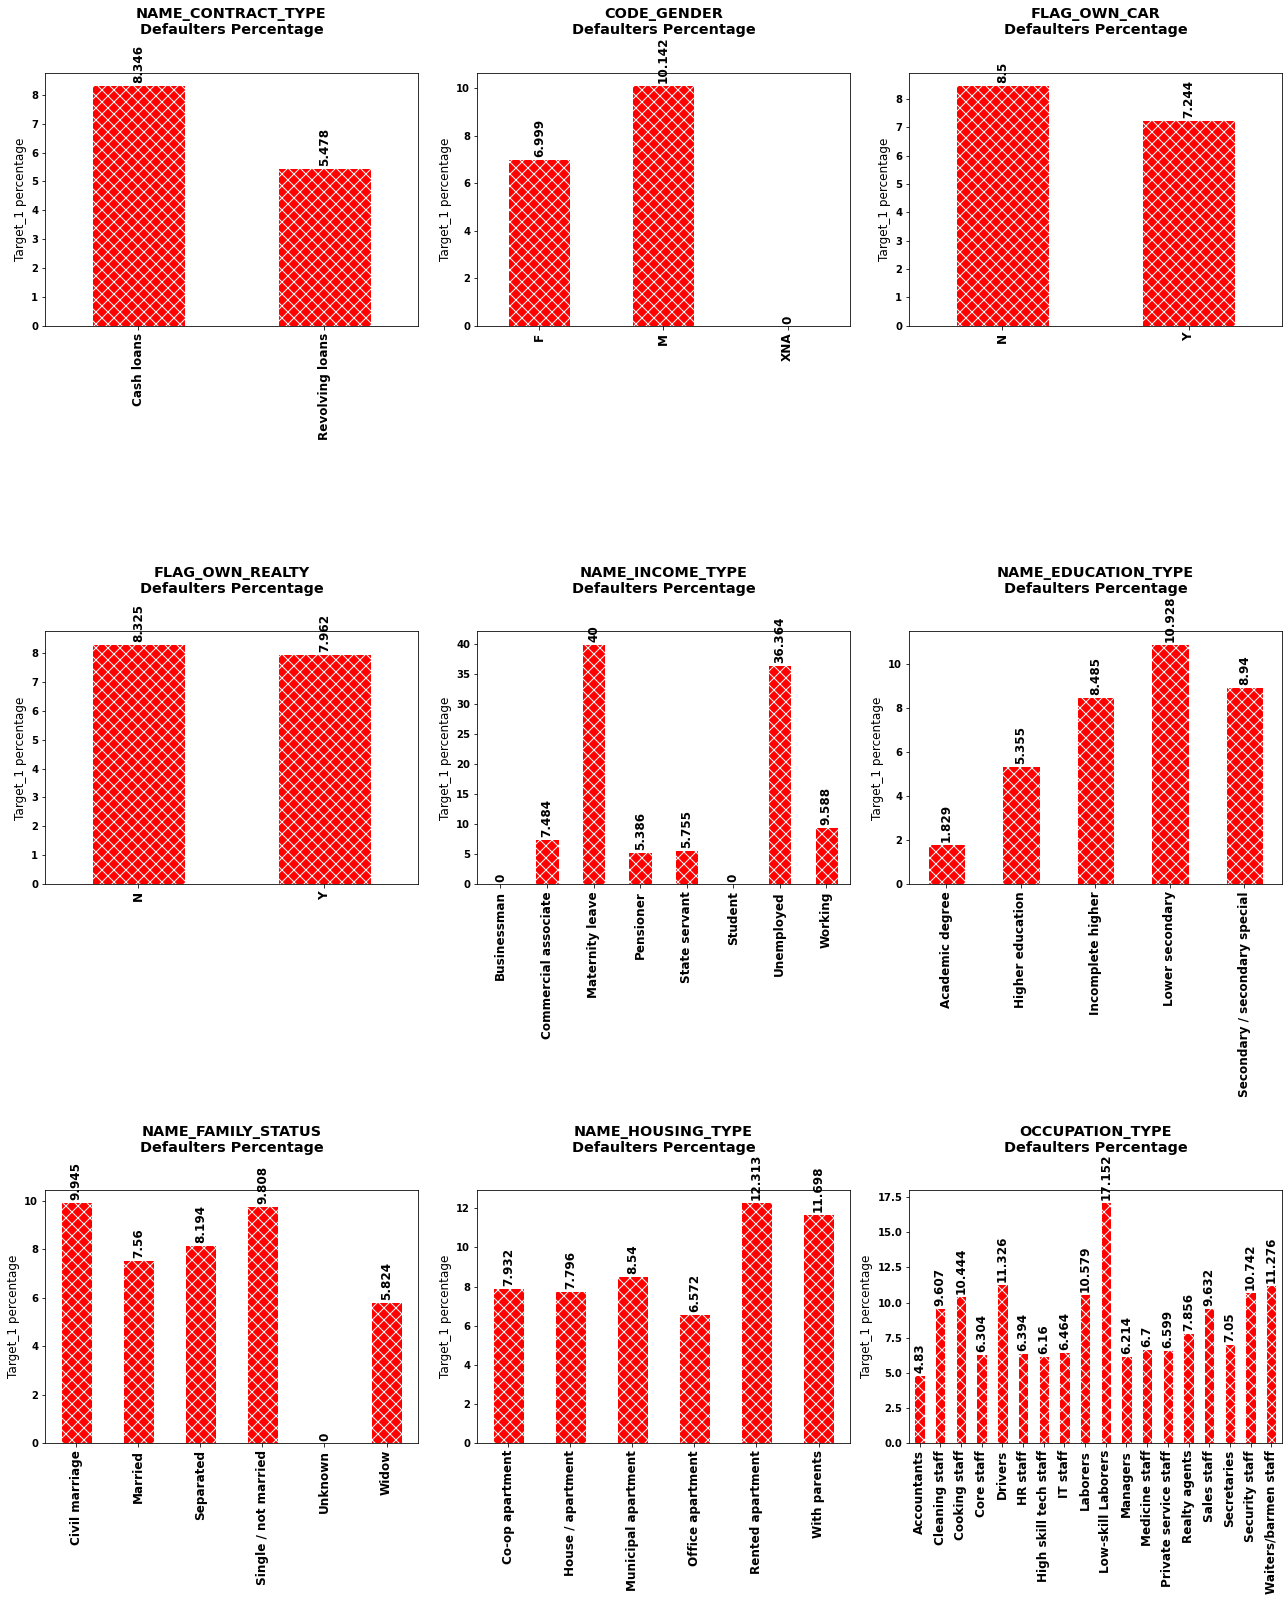

In [31]:
plt.figure(figsize=(18,28))
impcol = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
for index,col in enumerate(impcol):
    plt.subplot(len(impcol)//2,3,index+1)
    ax = round(bank1.groupby(col).TARGET.mean()*100,3).plot.bar(color = "red",hatch="\\\\//",edgecolor="white")
    ax.bar_label(ax.containers[0],padding=2,rotation=90,fontsize=12)
    plt.title(f"{col}\nDefaulters Percentage\n\n",weight="bold")
    plt.ylabel("Target_1 percentage")
    plt.xlabel(" ")
    plt.xticks(fontsize=12)
    plt.tight_layout()

<div class="alert alert-block alert-info">

<font color="black">

**Observation :**

 - Default rate is high in Cash loans than revolving loans.
 - Default rate is high in Males then Females.
 - People who do not own car have high default rate than people who own car.
 - People who do not own Realty have high default rate than people who own Realty.
 - Unemployed,Maternity leave & Working people have high default rate than commercial associate, pensioner & state servant.
 - Lower education people have high default rate than people having higher education.
 - Civil marriage and single people have high default rate.

<br>

### Categorical v/s Numerical Bivariate Analysis

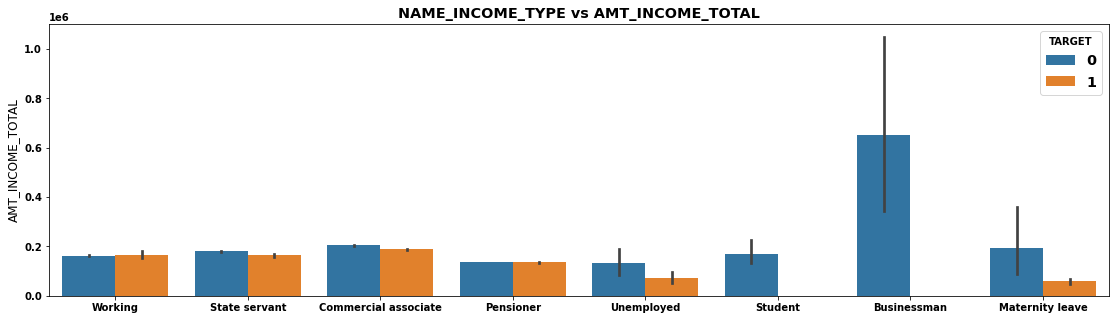

In [32]:
plt.figure(figsize=(19,5))
sns.barplot(x = "NAME_INCOME_TYPE",y = "AMT_INCOME_TOTAL", data=bank1,hue="TARGET")
plt.title("NAME_INCOME_TYPE vs AMT_INCOME_TOTAL",weight="bold")
plt.xlabel("")
plt.show()

<div class="alert alert-block alert-info">

<font color="black">

**Observation :**

 - As shown in the graph above, people with high income, such as businessmen, have a 0% default rate.
 - People with low income, less than or equal to 2 lakh, can be either defaulters or non-defaulters.

<br>

### Numerical v/s Numerical Bivariate Analysis

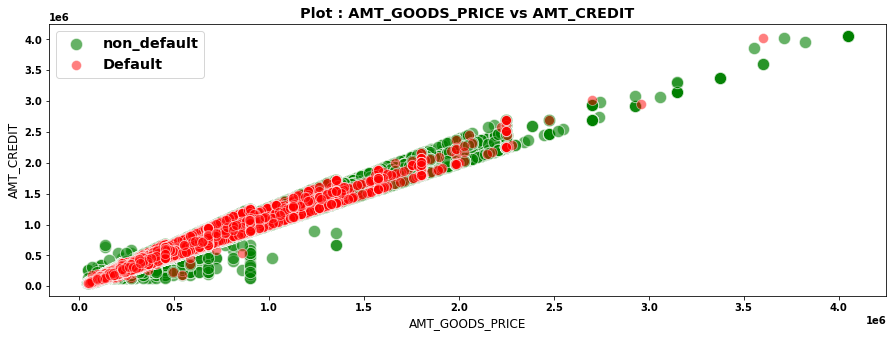

In [33]:
sns.scatterplot(x = "AMT_GOODS_PRICE",y = "AMT_CREDIT", data=non_default, color = "green", alpha=0.6,s=150, label = "non_default")
sns.scatterplot(x = "AMT_GOODS_PRICE",y = "AMT_CREDIT", data=default, color = "red", alpha=0.5, s = 100, label="Default")
plt.title("Plot : AMT_GOODS_PRICE vs AMT_CREDIT",weight="bold")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">

<font color="black">

**Observation :**


 - people with low AMT_CREDIT and AMT_GOODS_PRICE have a high default rate
 - people with high AMT_CREDIT and AMT_GOODS_PRICE have a low default rate.

<br>

# Correlations for Non-Defaulters

##### Creating heatmap for non-defaulters :

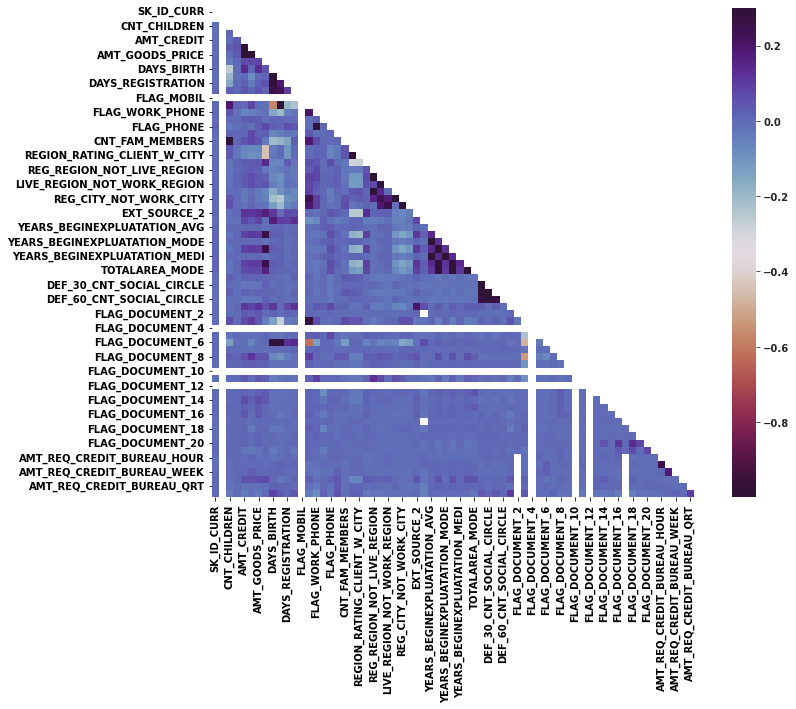

In [34]:
import numpy as np
corr = default.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cbar = True, cmap='twilight_shifted_r')

##### Finding out Percentage of correlation in Non-Defaulters : 

In [35]:
corr_0 = non_default.corr().abs()
corr_0 = corr_0.unstack().sort_values(kind="quicksort")
corr_0 = corr_0.dropna()
corr_0 = corr_0[corr_0 != 1.0].sort_values(ascending=False)
print(corr_0.reset_index().drop_duplicates(subset=0,keep="first").reset_index().drop("index",axis=1).head(30))

                         level_0                       level_1         0
0                  DAYS_EMPLOYED                FLAG_EMP_PHONE  0.999756
1       OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE  0.998508
2                 FLOORSMAX_MEDI                 FLOORSMAX_AVG  0.997018
3    YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI  0.993582
4                 FLOORSMAX_MODE                FLOORSMAX_MEDI  0.988153
5                AMT_GOODS_PRICE                    AMT_CREDIT  0.987250
6                  FLOORSMAX_AVG                FLOORSMAX_MODE  0.985603
7   YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG  0.971032
8   YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE  0.962064
9    REGION_RATING_CLIENT_W_CITY          REGION_RATING_CLIENT  0.950149
10                  CNT_CHILDREN               CNT_FAM_MEMBERS  0.878571
11    REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION  0.861861
12      DEF_30_CNT_SOCIAL_CIRCLE      DEF_60_CNT_SO

<div class="alert alert-block alert-warning">

<font color="black">

##### Top 10 Non-Defaulter Correlations :  
    
    DAYS_EMPLOYED                             FLAG_EMP_PHONE  0.999756
    OBS_60_CNT_SOCIAL_CIRCLE        OBS_30_CNT_SOCIAL_CIRCLE  0.998508
    AMT_GOODS_PRICE                               AMT_CREDIT  0.987250
    REGION_RATING_CLIENT_W_CITY         REGION_RATING_CLIENT  0.950149
    CNT_CHILDREN                             CNT_FAM_MEMBERS  0.878571
    REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION  0.861861
    LIVE_CITY_NOT_WORK_CITY           REG_CITY_NOT_WORK_CITY  0.830381
    AMT_ANNUITY                              AMT_GOODS_PRICE  0.776686
    AMT_CREDIT                                   AMT_ANNUITY  0.771309
    DAYS_EMPLOYED                                 DAYS_BIRTH  0.626114


### Correlation for Defaulter

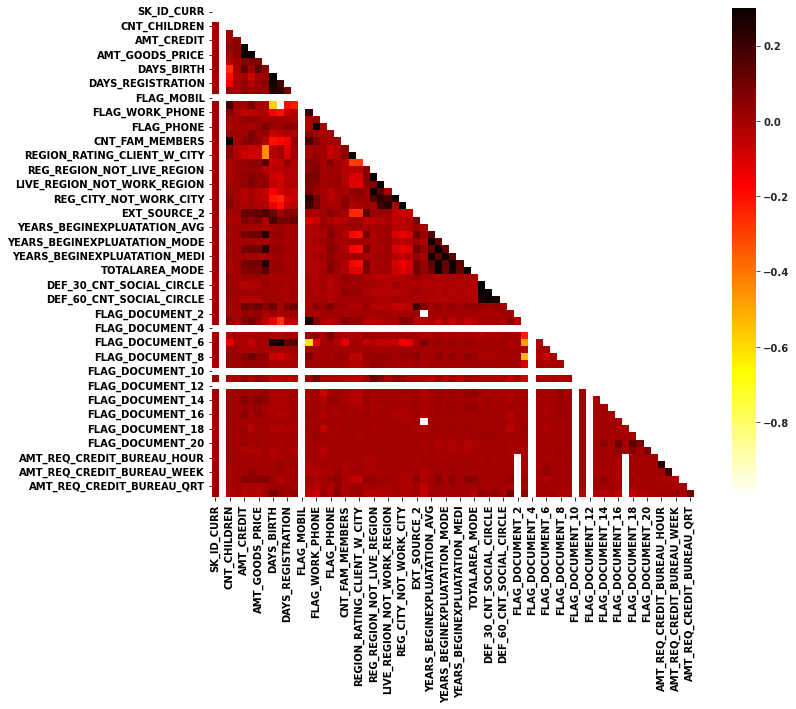

In [36]:
corr = default.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True , cmap = 'hot_r')

##### Finding out Percentage of correlation in Defaulters : 

In [37]:
corr_1 = default.corr().abs()
corr_1 = corr_1.unstack().sort_values(kind="quicksort")
corr_1 = corr_1.dropna()
corr_1 = corr_1[corr_1 != 1.0].sort_values(ascending=False)
print(corr_1.reset_index().drop_duplicates(subset=0,keep="first").reset_index().drop("index",axis=1).head(30))

                         level_0                       level_1         0
0                  DAYS_EMPLOYED                FLAG_EMP_PHONE  0.999705
1       OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE  0.998269
2                 FLOORSMAX_MEDI                 FLOORSMAX_AVG  0.997187
3    YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI  0.996124
4                 FLOORSMAX_MODE                FLOORSMAX_MEDI  0.989195
5                 FLOORSMAX_MODE                 FLOORSMAX_AVG  0.986594
6                AMT_GOODS_PRICE                    AMT_CREDIT  0.983103
7    YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE  0.980466
8   YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE  0.978073
9           REGION_RATING_CLIENT   REGION_RATING_CLIENT_W_CITY  0.956637
10                  CNT_CHILDREN               CNT_FAM_MEMBERS  0.885484
11      DEF_30_CNT_SOCIAL_CIRCLE      DEF_60_CNT_SOCIAL_CIRCLE  0.868994
12   LIVE_REGION_NOT_WORK_REGION    REG_REGION_NOT_

<div class="alert alert-block alert-warning">

<font color="black">

##### Top 10 Defaulter Correlations : 

    DAYS_EMPLOYED                              FLAG_EMP_PHONE  0.999705
    OBS_60_CNT_SOCIAL_CIRCLE         OBS_30_CNT_SOCIAL_CIRCLE  0.998269
    AMT_GOODS_PRICE                                AMT_CREDIT  0.983103
    REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY  0.956637
    CNT_CHILDREN                              CNT_FAM_MEMBERS  0.885484
    LIVE_REGION_NOT_WORK_REGION    REG_REGION_NOT_WORK_REGION  0.847885
    REG_CITY_NOT_WORK_CITY            LIVE_CITY_NOT_WORK_CITY  0.778540
    AMT_ANNUITY                               AMT_GOODS_PRICE  0.752699
    AMT_CREDIT                                    AMT_ANNUITY  0.752195
    DAYS_EMPLOYED                                  DAYS_BIRTH  0.582185





## Reading Previous Application

In [38]:
pre = pd.read_csv(r"C:\Users\HP\Downloads\Credit EDA Case Study\previous_application.csv")
print(pre.shape)
pre.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
pre.SK_ID_CURR.value_counts().head()

187868    77
265681    73
173680    72
242412    68
206783    67
Name: SK_ID_CURR, dtype: int64

In [40]:
pre.SK_ID_PREV.value_counts().head()

2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
Name: SK_ID_PREV, dtype: int64

<div class="alert alert-block alert-warning">
<font color="black">

As shown above, the shape of the **previous application is (1670214, 37)**, and the length of **SK ID PREV is also (1670214)**, but the length of **SK ID CURR is (338857)**, which is less than the length of **SK ID PREV**, indicating that there are duplicates of **SK ID PREV**.
<br><br>


### Merging  Current application and previous application by SK_ID_CURR


In [41]:
curr_pre = bank1.merge(pre, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
curr_pre.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash th

In [42]:
# Shape of curr_pre :
curr_pre.shape

(1413701, 117)

In [43]:
#Checking the SK_ID_CURR unique.
curr_pre.SK_ID_CURR.value_counts().head()

265681    73
173680    72
242412    68
206783    67
389950    64
Name: SK_ID_CURR, dtype: int64

<div class="alert alert-block alert-warning">
<font color="black">
As we can see Now the <b>curr_pre dataframe is having 1413701 rows</b>. The new dataframe will have a duplicate number of <b>SK_ID_CURR</b> after merging both dataframes. This should not be a problem because we are attempting to determine whether a pattern exists by including cases where a lender has previously taken out a loan more than once.
<br><br>

##### Now Splitting the curr_pre dataframe in to two parts Defaulter & Non-Defaulter :

In [44]:
curr_pre_0 = curr_pre[curr_pre['TARGET'] == 0]
curr_pre_1 = curr_pre[curr_pre['TARGET'] == 1]

In [45]:
# Size of both data frame:
print("curr_pre_0 :",curr_pre_0.shape)
print("curr_pre_1 :",curr_pre_1.shape)

curr_pre_0 : (1291341, 117)
curr_pre_1 : (122360, 117)


In [46]:
# Categorical columns in new merged dataframe curr_pre.
print(list(curr_pre.select_dtypes(include = "object").columns))

['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_y', 'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


# Univariate & Segmented Univariate Analysis on Merged DataFrame : 

## Univariate & Segmented Analysis on Categorical Columns 

##### Selecting 10 important categorical columns for analysis : 

In [47]:
cat_col_cp10 = ['CODE_GENDER','NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE_x','NAME_CONTRACT_TYPE_y','NAME_TYPE_SUITE_x','NAME_TYPE_SUITE_y','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','ORGANIZATION_TYPE']

##### Plotting graph for Categorical Columns - univariate & univariate segmented analysis : 

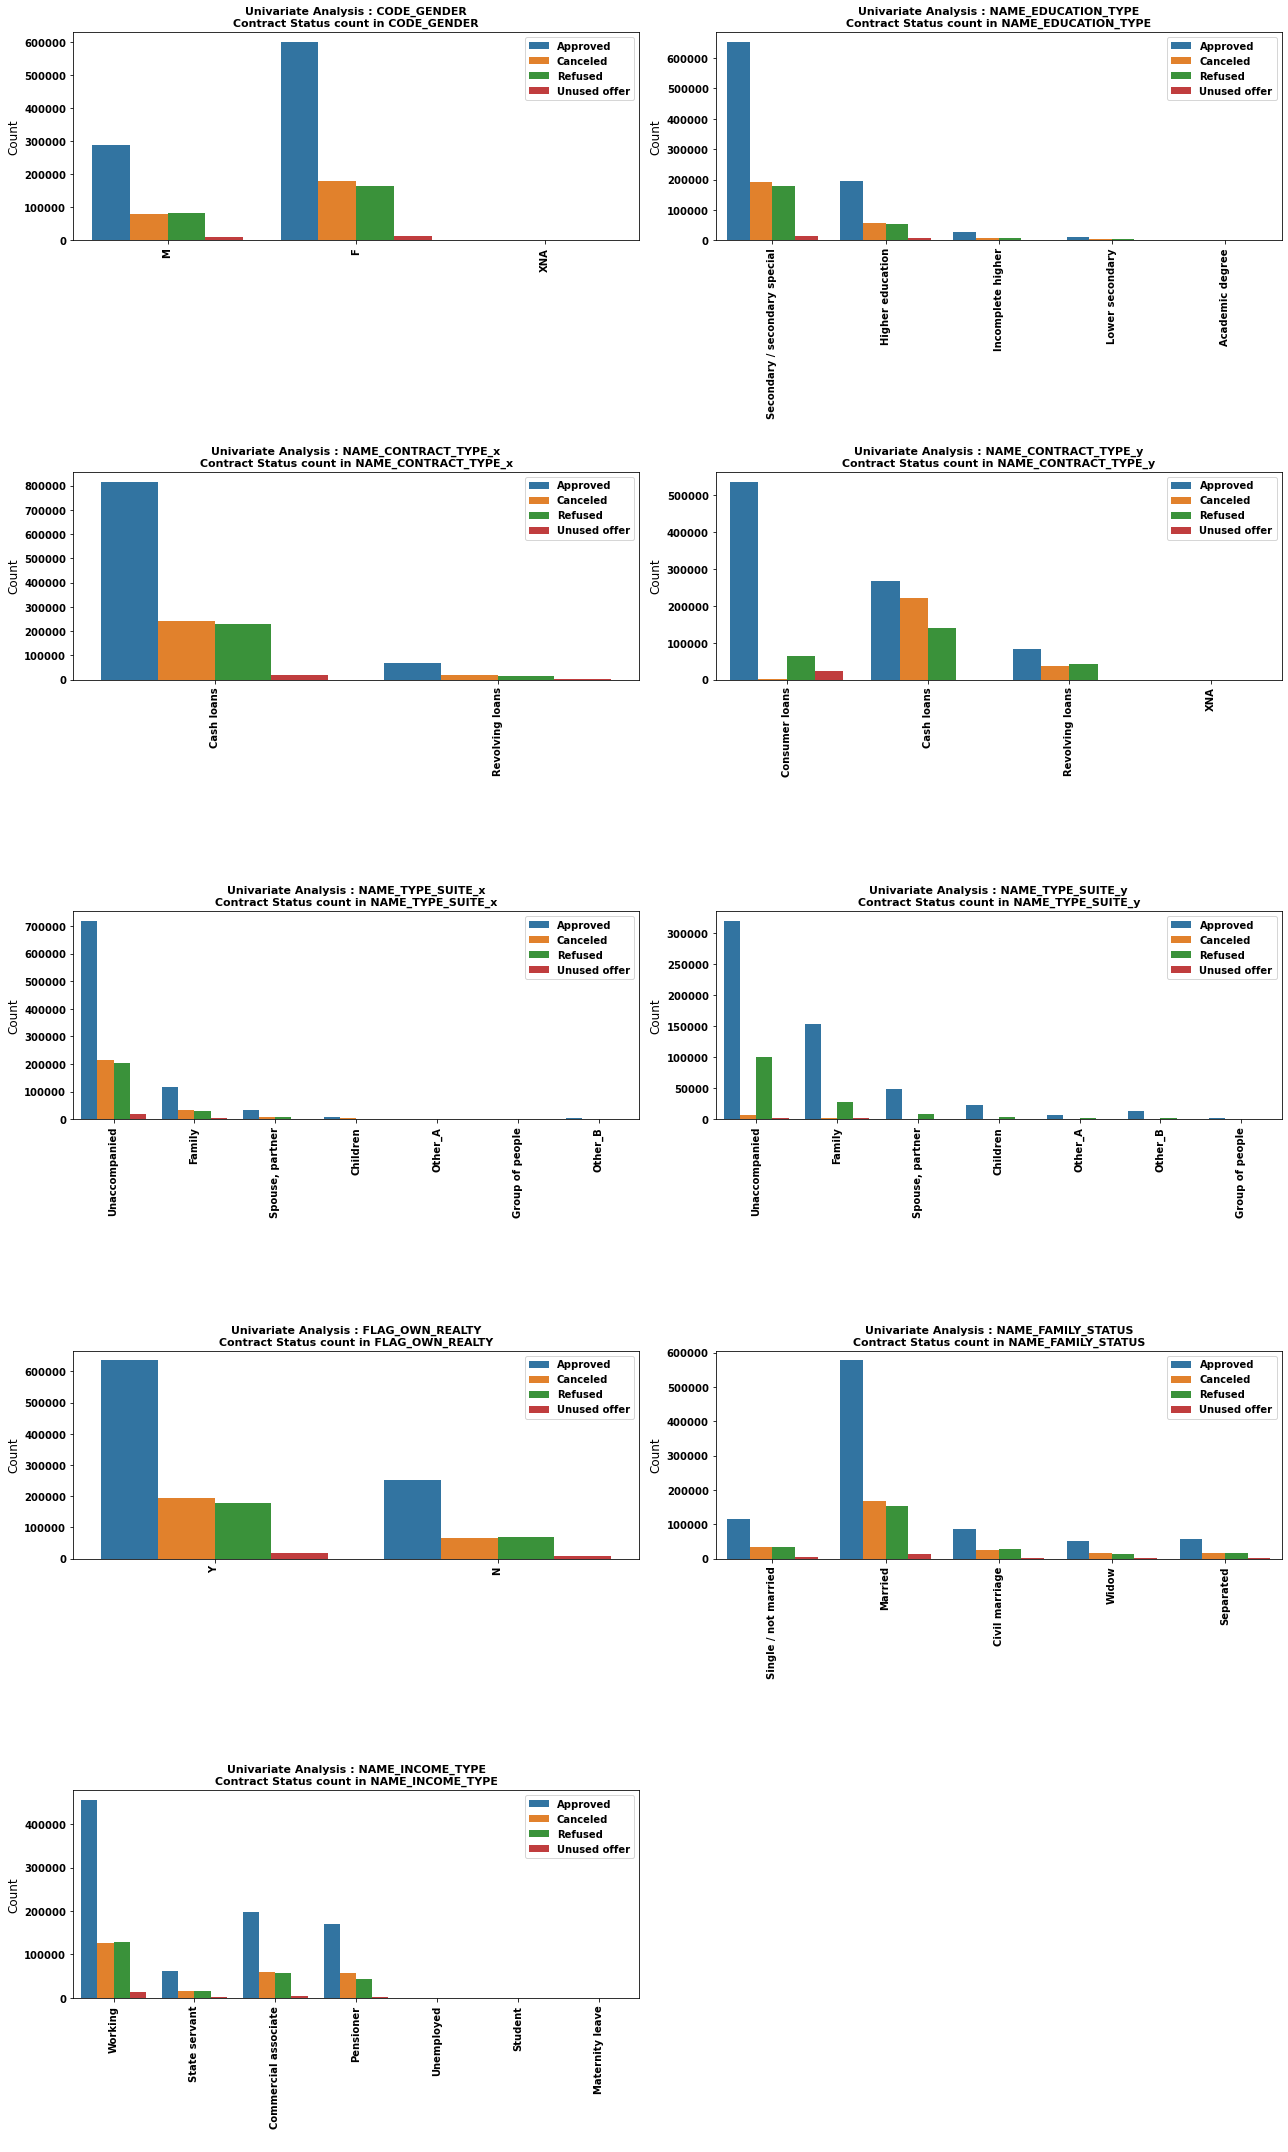

In [48]:
plt.figure(figsize=(18,30))
for index,col in enumerate(cat_col_cp10[:-1]):
    
    plt.subplot(len(cat_col_cp10)//2,2,index+1)
    sns.countplot(x = col, data = curr_pre, hue = "NAME_CONTRACT_STATUS")
    plt.title(f"Univariate Analysis : {col}\nContract Status count in {col}",weight="bold",fontsize=11)
    plt.xticks(rotation=90)
    plt.xlabel(" ")
    plt.ylabel("Count")
    plt.legend(fontsize=10,loc='upper right')

    plt.tight_layout()
    plt.show

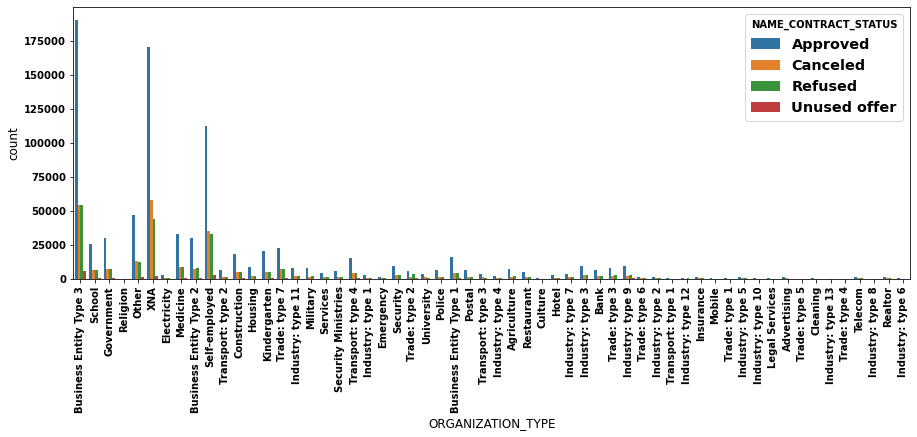

In [49]:
# Created Organization_Type plot alone for clear view.
sns.countplot(x = 'ORGANIZATION_TYPE', data = curr_pre, hue = "NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">

<font color = "black">

**Observation :**
    
 - In CODE_GENDER female loans are approved more than males.
 - Saturday had the highest approval rate in previous applications. However, in the current application, it is Tuesday.
 - Unaccompanied has the highest number in both NAME CONTRACT TYPE Previous and NAME CONTRACT TYPE Current.
 - Currently, banks only offer two types of loans: cash loans and revolving loans. Previously, the bank offered cash, revolving, and consumer loans.
 - Previously, consumer loans were the most common, but now cash loans are the most common.

<br>

## Univariate & Segmented Analysis on Numerical Columns :

In [50]:
# Extracting Numerical columns in new merged dataframe curr_pre
print(list(curr_pre.select_dtypes(exclude = "object").columns))

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 

##### Selecting 10 important Numerical columns for analysis :

In [51]:
num_col_cp10 = ['AMT_ANNUITY_x','AMT_ANNUITY_y','AMT_CREDIT_x','AMT_CREDIT_y','AMT_GOODS_PRICE_x','AMT_GOODS_PRICE_y','CNT_FAM_MEMBERS','CNT_CHILDREN','HOUR_APPR_PROCESS_START_x','HOUR_APPR_PROCESS_START_y']

##### Plotting graph for Numerical Columns - univariate & univariate segmented analysis :

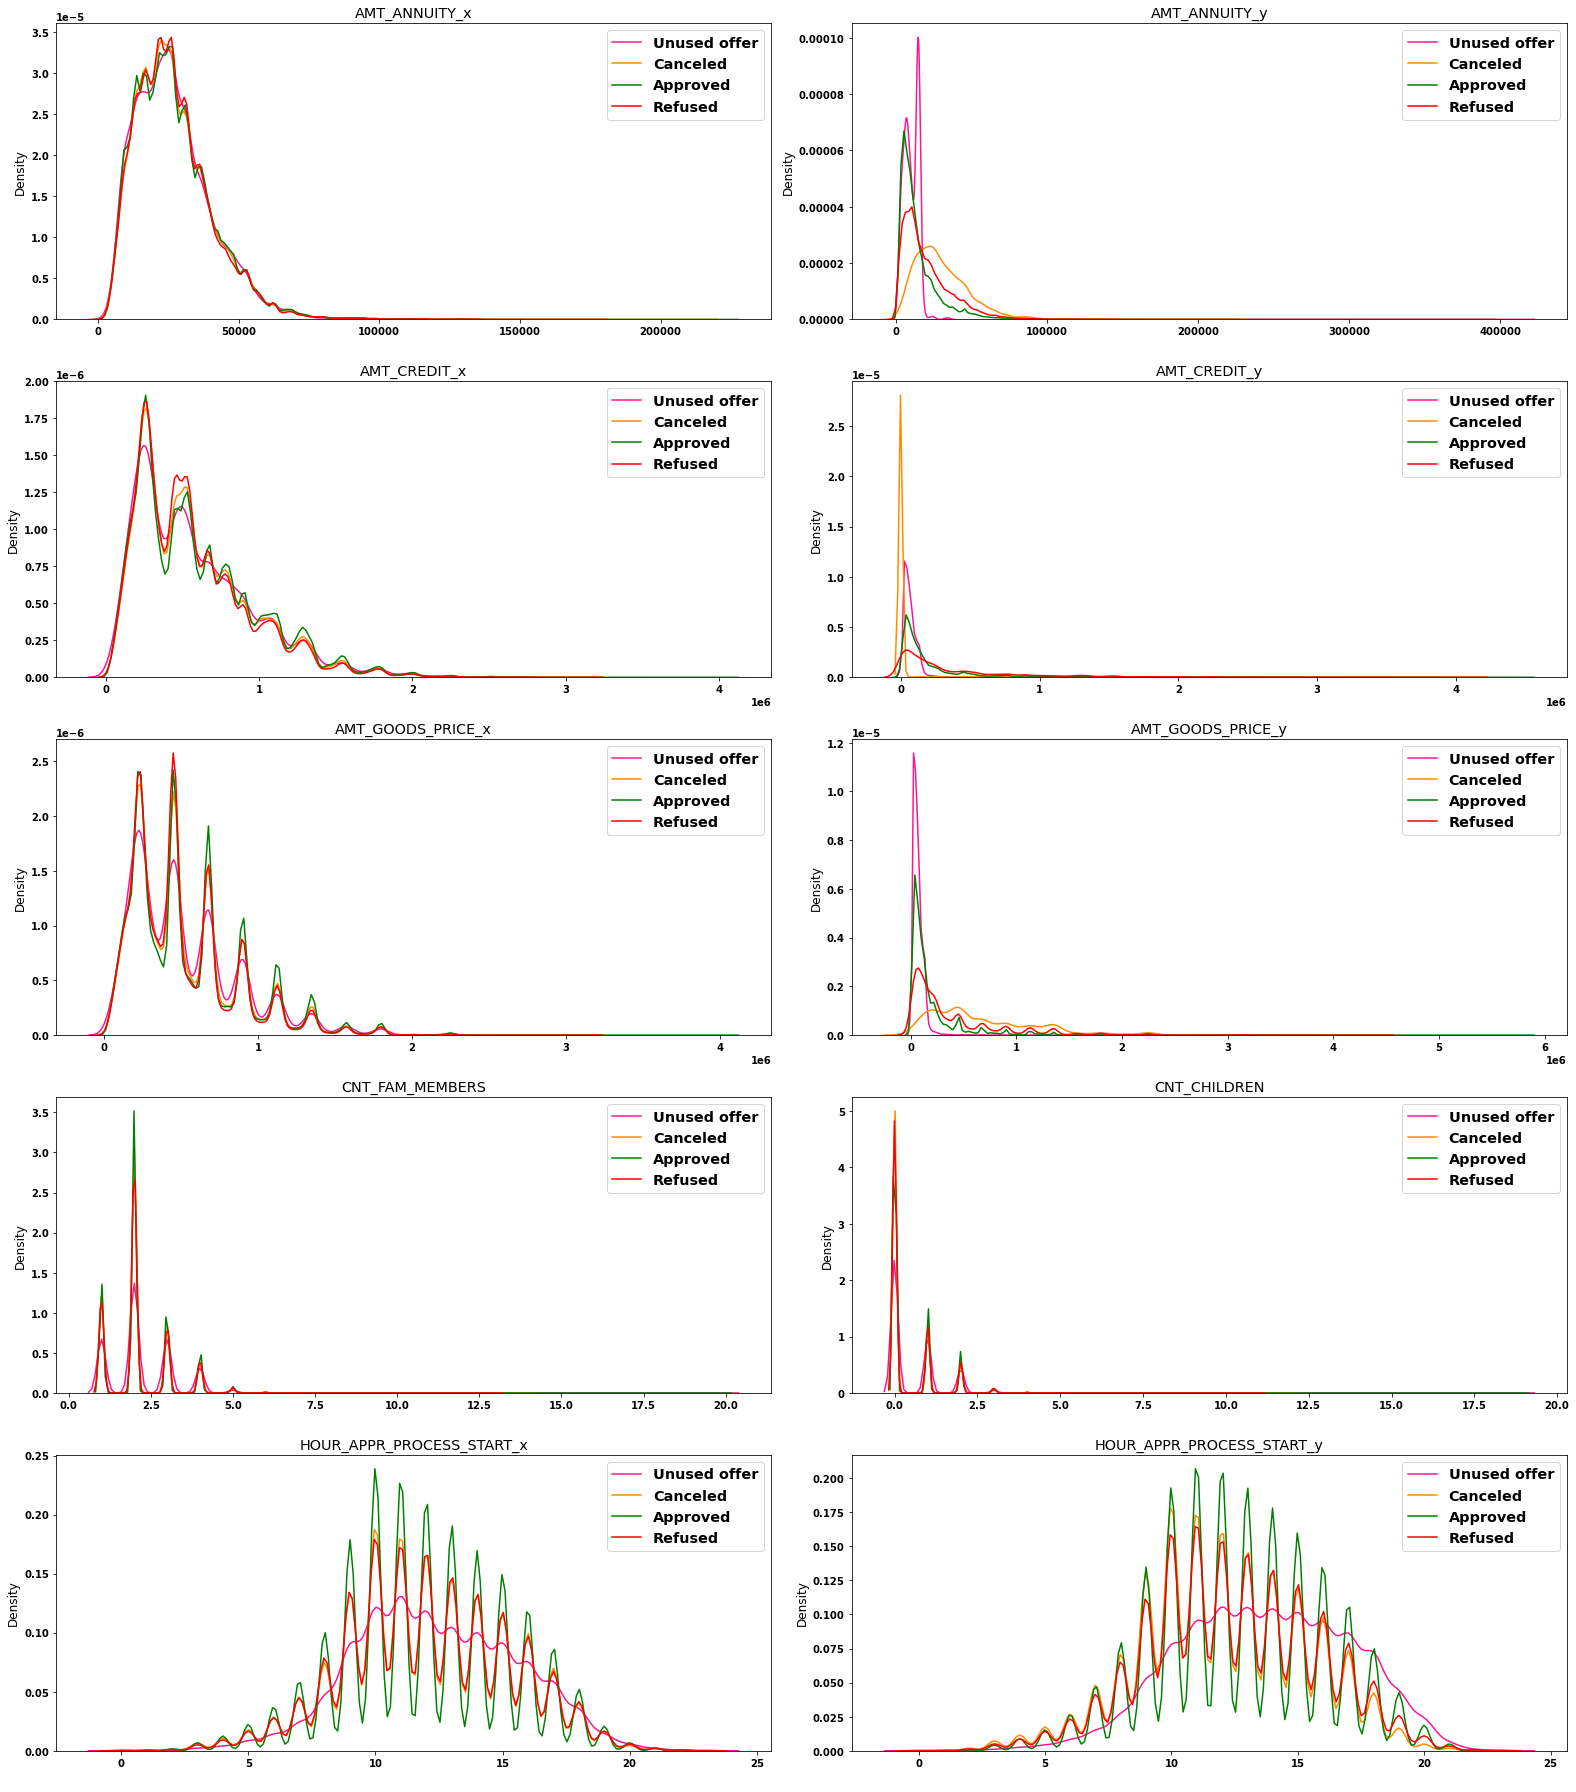

In [53]:
plt.figure(figsize=(22,25))
for index,col in (enumerate(num_col_cp10)):
    plt.subplot(len(num_col_cp10)//2,2,index+1)
    sns.distplot(curr_pre.loc[curr_pre.NAME_CONTRACT_STATUS=='Unused offer',:][col].dropna(),hist=False,label='Unused offer',color = "deeppink")
    sns.distplot(curr_pre.loc[curr_pre.NAME_CONTRACT_STATUS=='Canceled',:][col].dropna(),hist=False,label='Canceled',color="darkorange")
    sns.distplot(curr_pre.loc[curr_pre.NAME_CONTRACT_STATUS=='Approved',:][col].dropna(),hist=False,label='Approved', color="g")
    # we added kde_kws={'bw':0.1} in parameter to overcome bandwidth limitation.
    sns.distplot(curr_pre.loc[curr_pre.NAME_CONTRACT_STATUS=='Refused',:][col].dropna(),hist=False,label='Refused',color="red")
    plt.title(col)
    plt.xlabel(" ")
    plt.legend(loc="upper right")
    plt.tight_layout()

<div class="alert alert-block alert-info">

<font color = "black">
    
**Obeservation :**
    
As we can see from graphs

 - A large number of applications for both current and previous data are filed between 9 a.m. and 2 p.m. As a result, the busiest hours for the bank are from 9 a.m. to 2 p.m.


 - Loans are more common in nuclear families.
    

 - Previously, the bank had a high number of unused offers, but the number of refused offers is currently high in the case of AMT GOODS PRICE.
    

 - Previously, the bank had a high number of unused offers, and the current number of cancelled/refused offers for AMT ANNUITY is comparable.

    
 - Previously, the bank had a large number of unused offers and a large number of refused offers for AMT CREDIT.


# Bivariate Analysis of Merged Data curr_pre : 

##### Plotting a graph between NAME_CONTRACT_STATUS  & AMT_INCOME_TOTAL :

In [ ]:
sns.barplot(x = "NAME_CONTRACT_STATUS", y = "AMT_INCOME_TOTAL", data=curr_pre, hue="TARGET")
plt.show()

<div class="alert alert-block alert-info">
    
<font color ="black">
    
**Observation :**
    
 Above graph shows that the people who have not used offer earlier have defaulted more even when there average income is higher than others

<br>

## Concusions :

After analysing the datasets, there are a few characteristics of a client that the bank can use to determine whether or not they will repay the loan. The analysis is comprised of the following factors and categorization:

<div class="alert alert-block alert-success">

<font color="black">
<b>Factors to determine whether an applicant will be a Repayer:</b> 
<ol>
<li>CODE_GENDER: Females default less.
<li>NAME_CONTRACT_TYPE: The default rate on revolving loans is lower.
<li>NAME EDUCATION TYPE: There are fewer defaults for Academic degree.
<li>NAME INCOME TYPE: There are no defaults for students or business owners.
<li>ORGANIZATION TYPE: Less than 3% of clients with Trade Types 4 and 5 and Industry Type 8 have defaulted.
<li>DAYS BIRTH: People over the age of 50 have a low likelihood of defaulting.
<li>DAYS EMPLOYED: Clients with 40+ years of experience have a default rate of less than 1%.
<li>AMT INCOME TOTAL: Applicants earning more than $700,000 are less likely to default.
<li>CNT CHILDREN: People with 0 to 2 children are more likely to repay their loans.

<div class="alert alert-block alert-warning">

<font color="black">

<b>Decisive Factor whether an applicant will be Defaulter:</b>

<ol>    
<li>CODE GENDER: Men have a higher default rate.
<li>NAME FAMILY STATUS: People who have civil marriages or are single frequently default.
<li>NAME EDUCATION TYPE: People with a Lower Secondary and Secondary education are more likely to default.
<li>NAME INCOME TYPE: Clients on Maternity Leave OR Unemployed frequently default.
<li>OCCUPATION TYPE: Avoid low-skilled labourers, drivers, waiters/bartenders, security personnel, labourers, and cooks <li>because the default rate is extremely high.
<li>ORGANIZATION TYPE: Transport: type 3 (16%), Industry: type 13 , Industry: type 8 , and Restaurant: type 3  are the organisations with the highest percentage of loans not repaid (less than 12 percent ). Self-employed people have a high default rate and should be avoided when applying for a loan or providing a loan with a higher interest rate to mitigate the risk.
<li>DAYS BIRTH: Avoid young people between the ages of 20 and 40 because they are more likely to default.
<li>DAYS EMPLOYED: People with less than five years of experience have a high default rate.
<li>CNT CHILDREN & CNT FAM MEMBERS: Clients with children equal to or greater than 9 default 100%, and their applications will be rejected.

<center> -----------------------------------------------------

In [1]:
import os
os.getcwd()

'C:\\Users\\AEPAC\\Desktop\\KnowledgeHut\\2023\\Case EDA Case Study\\Credit EDA Case Study - Shivam Sharma - Dsc43'

### <center><b> Thank You